# EDA:  Default of Credit Card - Modelagem para avaliação de risco de crédito.

[1 Import Bibliotecas](#1-IMPORT-BIBLIOTECAS)  
[2 Leitura dos Dados](#2-LEITURA-DOS-DADOS)  
[3 Limpeza](#3-LIMPEZA)  
[4 Analise Exploratória dos dados (EDA)](#4-ANALISE-EXPLORATÓRIA-DOS-DADOS-(E.D.A))  
[5 Amostragem](#5-AMOSTRAGEM-ESTRATIFICADA)  
[6 Seleção de Features](#6-SELECAO-DE-FEATURES)  
[7 Prototipação](#7-PROTOTIPAÇÃO)  
[8 Modelagem: Machine Learning](#8-MODELAGEM:-MACHINE-LEARNING)  
[9 Validacao Estatística](#9-VALIDACAO-ESTATISTICA)  
  


# 1 IMPORT BIBLIOTECAS

## 1.1 Import

In [1]:
## Manipulação de dados
import pandas as pd
import numpy as np

## Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

# 2 LEITURA DOS DADOS

## 2.1 Leitura

In [2]:
df = pd.read_csv('../data/raw/UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## 2.2 Descrição das variáveis

**ID** ID of each client  
**LIMIT_BAL** Amount of given credit in NT dollars (includes individual and family/supplementary credit  
**SEX** Gender (1=male, 2=female)  
**EDUCATION** (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)  
**MARRIAGE** Marital status (1=married, 2=single, 3=others)  
**AGE** Age in years  
**PAY_0** Repayment status in September, 2005 (-2 corresponds to there being no credit to pay; -1=pay duly, 0= payment being made on time but not the total amount to clear the balance, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)  
**PAY_2** Repayment status in August, 2005 (scale same as above)  
**PAY_3** Repayment status in July, 2005 (scale same as above)  
**PAY_4** Repayment status in June, 2005 (scale same as above)  
**PAY_5** Repayment status in May, 2005 (scale same as above)  
**PAY_6** Repayment status in April, 2005 (scale same as above)  
**BILL_AMT1** Amount of bill statement in September, 2005 (NT dollar)  
**BILL_AMT2** Amount of bill statement in August, 2005 (NT dollar)  
**BILL_AMT3** Amount of bill statement in July, 2005 (NT dollar)  
**BILL_AMT4** Amount of bill statement in June, 2005 (NT dollar)  
**BILL_AMT5** Amount of bill statement in May, 2005 (NT dollar)  
**BILL_AMT6** Amount of bill statement in April, 2005 (NT dollar)  
**PAY_AMT1** Amount of previous payment in September, 2005 (NT dollar)  
**PAY_AMT2** Amount of previous payment in August, 2005 (NT dollar)  
**PAY_AMT3** Amount of previous payment in July, 2005 (NT dollar)  
**PAY_AMT4** Amount of previous payment in June, 2005 (NT dollar)  
**PAY_AMT5** Amount of previous payment in May, 2005 (NT dollar)  
**PAY_AMT6** Amount of previous payment in April, 2005 (NT dollar)  
**default.payment.next.month** Default payment (1=yes, 0=no)  

In [3]:
## Rename indice PAY_O para PAY_1
df = df.rename(columns={'PAY_0':'PAY_1'})

In [ ]:
## Removing ID Cliente
df.drop()

## 2.3 Visualização resumida do dataset

In [4]:
print("Numero de linhas = {}".format(df.shape[0]))
print("Numero de colunas = {}".format(df.shape[1]))

Numero de linhas = 30000
Numero de colunas = 25


In [5]:
#import pandas_profiling
#pandas_profiling.ProfileReport(df)

## 2.4 Visualização tipo dos dados

In [6]:
df.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_1                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

## 2.5 Visualização de valores únicos por coluna

In [7]:
for feature in df.columns:
    print("-----------------------------------------------------------------------------------")
    print(f"Quantidade de registros unicos para a variável = {feature} - {df[feature].nunique()}")
    
    ## Printa os valores unicos caso a variávei possua menos de 3 valores unicos
    if df[feature].nunique()<=8:
        
        for valor_unico in df[feature].unique():
            print(f"Valor único: {valor_unico}")

-----------------------------------------------------------------------------------
Quantidade de registros unicos para a variável = ID - 30000
-----------------------------------------------------------------------------------
Quantidade de registros unicos para a variável = LIMIT_BAL - 81
-----------------------------------------------------------------------------------
Quantidade de registros unicos para a variável = SEX - 2
Valor único: 2
Valor único: 1
-----------------------------------------------------------------------------------
Quantidade de registros unicos para a variável = EDUCATION - 7
Valor único: 2
Valor único: 1
Valor único: 3
Valor único: 5
Valor único: 4
Valor único: 6
Valor único: 0
-----------------------------------------------------------------------------------
Quantidade de registros unicos para a variável = MARRIAGE - 4
Valor único: 1
Valor único: 2
Valor único: 3
Valor único: 0
-------------------------------------------------------------------------------

## 2.6 Separação target, features categóricas e features contínuas / discretas.

In [8]:
features_continuas = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
features_categoricas = ['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
var_target = 'default.payment.next.month'

# 3 LIMPEZA

## 3.1 Valores faltantes

In [9]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [10]:
df.dropna(inplace=True)

- Não há registros nulos no dataset

## 3.2 Registros duplicados

In [11]:
df.duplicated().sum()

0

In [12]:
df = df.drop_duplicates()
df.duplicated().sum()

0

## 3.3 Exclusão colunas

- O id identificador não são features úteis para construção da máquina preditiva

In [13]:
df = df.drop(columns=["ID"])

## 3.4 Descritiva

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


## 3.5 Exploratória - Insights

In [15]:
df_aux = df.groupby(['PAY_1']).agg(qtd_pessoas = ('default.payment.next.month','count'),
                                                                      qtd_inadimplentes = ('default.payment.next.month','sum'))

df_aux['proporc_inadimpl'] = df_aux['qtd_inadimplentes'] / df_aux['qtd_pessoas']
df_aux


,qtd_pessoas,qtd_inadimplentes,proporc_inadimpl
PAY_1,,,
-2,2759,365,0.132294
-1,5686,954,0.167781
0,14737,1888,0.128113
1,3688,1252,0.339479
2,2667,1844,0.691414
3,322,244,0.757764
4,76,52,0.684211
5,26,13,0.500000
6,11,6,0.545455


- Há maior indices de inadimplência quanto maior o atraso (maior numero de PAY_X)
- Há 2 grandes saltos de inadimplência quando o cliente atrasa 1 mes passando de 12% á 34%, e o segundo salto a partir de 2 meses passando de 34% á 69% de inadimplencia.

In [16]:
df_aux = df.groupby(['PAY_1','PAY_2']).agg(qtd_pessoas = ('default.payment.next.month','count'),
                                                                      qtd_inadimplentes = ('default.payment.next.month','sum'))

df_aux['proporc_inadimpl'] = df_aux['qtd_inadimplentes'] / df_aux['qtd_pessoas']
df_aux

qtd_pessoas  qtd_inadimplentes  proporc_inadimpl
PAY_1 PAY_2                                                  
-2    -2            2561                345          0.134713
      -1             193                 17          0.088083
       2               5                  3          0.600000
-1    -1            4641                705          0.151907
       0             603                 82          0.135987
       2             387                137          0.354005
       3              47                 25          0.531915
       4               5                  3          0.600000
       5               3                  2          0.666667
 0    -1             478                 62          0.129707
       0           14259               1826          0.128059
 1    -2            1221                346          0.283374
      -1             612                126          0.205882
       0               3                  0          0.000000
       1              28                  5          0.178571
       2            1672                695          0.415670
       3             109                 61          0.559633
       4              32                 13          0.406250
       5               7                  4          0.571429
       6               2                  1          0.500000
       7               1                  1          1.000000
       8               1                  0          0.000000
 2    -1             126                 56          0.444444
       0             865                595          0.687861
       2            1591               1143          0.718416
       3              71                 44          0.619718
       4              14                  6          0.428571
 3     2             272                206          0.757353
       3              41                 30          0.731707
       4               8                  8          1.000000
       5               1                  0          0.000000
 4     3              58                 41          0.706897
       4              15                  8          0.533333
       5               3                  3          1.000000
 5     4              25                 12          0.480000
       6               1                  1          1.000000
 6     5              11                  6          0.545455
 7     6               9                  7          0.777778
 8     7              19                 11          0.578947

In [17]:
df_aux = df.groupby(['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']).agg(qtd_pessoas = ('default.payment.next.month','count'),
                                                                      qtd_inadimplentes = ('default.payment.next.month','sum'))

df_aux['proporc_inadimpl'] = df_aux['qtd_inadimplentes'] / df_aux['qtd_pessoas']
df_aux = df_aux.reset_index()

## Ordenando indicadores por agrupamento de pessoas com mais atrasos frequentes
df_aux = df_aux.sort_values(by = ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'], ascending=[False,False,False,False,False,False])
df_aux['Indices_Atrasos'] = df_aux.apply(lambda x: '_'.join( [ str(x[f'PAY_{i}']) for i in range(1,7)] ), axis=1)
df_aux = df_aux.set_index('Indices_Atrasos')
df_aux

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,qtd_pessoas,qtd_inadimplentes,proporc_inadimpl
Indices_Atrasos,,,,,,,,,
8.0_7.0_6.0_5.0_4.0_3.0,8,7,6,5,4,3,19,11,0.578947
7.0_6.0_5.0_4.0_3.0_2.0,7,6,5,4,3,2,9,7,0.777778
6.0_5.0_4.0_4.0_3.0_2.0,6,5,4,4,3,2,1,1,1.000000
6.0_5.0_4.0_3.0_2.0_2.0,6,5,4,3,2,2,2,0,0.000000
6.0_5.0_4.0_3.0_2.0_0.0,6,5,4,3,2,0,8,5,0.625000
...,...,...,...,...,...,...,...,...,...
-2.0_-2.0_-2.0_-2.0_-1.0_2.0,-2,-2,-2,-2,-1,2,8,1,0.125000
-2.0_-2.0_-2.0_-2.0_-1.0_0.0,-2,-2,-2,-2,-1,0,28,2,0.071429
-2.0_-2.0_-2.0_-2.0_-1.0_-1.0,-2,-2,-2,-2,-1,-1,49,9,0.183673


<Axes: ylabel='Indices_Atrasos'>

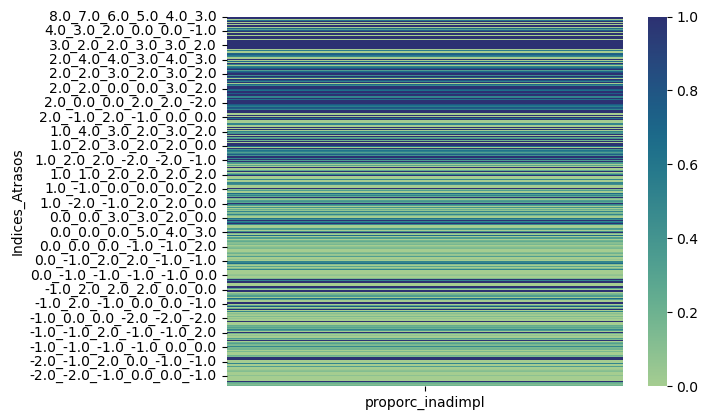

In [18]:
sns.heatmap(df_aux[['proporc_inadimpl']], cmap="crest")

- Observamos saltos de inadimplencia quanto maior os meses atrasados acumulados pelas variaveis historicas dos ultimos 6 meses

## 4 FEATURE ENGINEERING

## 4.1 Atraso 2 meses consecutivos no historico de 6 meses

PAY: Repayment status (-2 corresponds to there being no credit to pay; -1=pay duly, 0= payment being made on time but not the total amount to clear the balance, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above) 

In [19]:
df['atraso_2m_historico_6m'] = df.apply(lambda x: 1 if x['PAY_1']==2 or x['PAY_2']==2 or x['PAY_3']==2 or x['PAY_4']==2 or x['PAY_5']==2 or x['PAY_6']==2
                                        else 0, axis=1 )
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,atraso_2m_historico_6m
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,0


## 4.2 Não pagam o montante total da fatura em qlkr mes no historico de 6m

In [20]:
df['pago_parcial_hist_6m'] = df.apply(lambda x: 1 if x['PAY_1']==0 or x['PAY_2']==0 or x['PAY_3']==0 or x['PAY_4']==0 or x['PAY_5']==0 or x['PAY_6']==0
                                        else 0, axis=1 )

## 4.3 Valor total de pagamento no historico de 6 meses

In [21]:
df['BILL_TOTAL_6m'] = df['BILL_AMT1'] + df['BILL_AMT2'] + df['BILL_AMT3'] + df['BILL_AMT4'] + df['BILL_AMT5'] + df['BILL_AMT6'] 

## 4.4 Valor total da fatura no historico de 6 meses

In [22]:
df['PAY_AMT_TOTAL_6m'] = df['PAY_AMT1'] + df['PAY_AMT2'] + df['PAY_AMT3'] + df['PAY_AMT4'] + df['PAY_AMT5'] + df['PAY_AMT6']

## 4.5 Atingimento do limite por mes

In [23]:
for i in range(1,7):
    df[f'perc_atingimento_limite_{i}'] = df[f'BILL_AMT{i}']/df['LIMIT_BAL']

## 4.6 Percentual do valor da fatura pago por mes

In [24]:
for i in range(1,7):
    df[f'perc_pago_fatura_{i}'] = df[f'PAY_AMT{i}']/df[f'BILL_AMT{i}']
    df[f'perc_pago_fatura_{i}'] = df[f'perc_pago_fatura_{i}'].fillna(1) ## Será fillado com 100% caso nao haja fatura para pagar mas houve pagamento

## 4.7 Total saldo devedor: somatório do (valor da fatura - valor pagamento)

In [25]:
for i in range(1,7):
    df[f'saldo_devedor_{i}'] = df[f'BILL_AMT{i}'] - df[f'PAY_AMT{i}']

# 5 ANALISE EXPLORATÓRIA DOS DADOS (E.D.A)

## 5.1 Estatística Descritiva

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,1.674843e+05,129747.661567,1.000000e+04,50000.000000,140000.000000,240000.000000,1.000000e+06
SEX,30000.0,1.603733e+00,0.489129,1.000000e+00,1.000000,2.000000,2.000000,2.000000e+00
EDUCATION,30000.0,1.853133e+00,0.790349,0.000000e+00,1.000000,2.000000,2.000000,6.000000e+00
MARRIAGE,30000.0,1.551867e+00,0.521970,0.000000e+00,1.000000,2.000000,2.000000,3.000000e+00
AGE,30000.0,3.548550e+01,9.217904,2.100000e+01,28.000000,34.000000,41.000000,7.900000e+01
PAY_1,30000.0,-1.670000e-02,1.123802,-2.000000e+00,-1.000000,0.000000,0.000000,8.000000e+00
PAY_2,30000.0,-1.337667e-01,1.197186,-2.000000e+00,-1.000000,0.000000,0.000000,8.000000e+00
PAY_3,30000.0,-1.662000e-01,1.196868,-2.000000e+00,-1.000000,0.000000,0.000000,8.000000e+00
PAY_4,30000.0,-2.206667e-01,1.169139,-2.000000e+00,-1.000000,0.000000,0.000000,8.000000e+00
PAY_5,30000.0,-2.662000e-01,1.133187,-2.000000e+00,-1.000000,0.000000,0.000000,8.000000e+00


- Perc_atingimento_limite pode ser > 100% desde que a pessoa acumule a fatura num valor superior ao limite dela
- Perc_pago_fatura pode ser > 100% em casos em que a pessoa pagou acima da fatura (provavelmente devido á juros)
- Perc_pago_fatura pode ser == infinito caso a pessoa pague um valor mas não devia nada na fatura
- Por questões de modelagem infinito pode ser bastante prejudicial ao aprendizado, portanto iremos tratá-los considernado = 100%

In [27]:
df[df['perc_pago_fatura_1']==np.inf][['perc_pago_fatura_1','BILL_AMT1','PAY_AMT1']]

,perc_pago_fatura_1,BILL_AMT1,PAY_AMT1
38,inf,0.0,780.0
188,inf,0.0,5396.0
307,inf,0.0,5215.0
317,inf,0.0,165.0
386,inf,0.0,80000.0
...,...,...,...
29450,inf,0.0,1870.0
29470,inf,0.0,780.0
29529,inf,0.0,3095.0
29731,inf,0.0,840.0


In [28]:
for i in range(1,7):
    df[f'perc_pago_fatura_{i}'] = df[f'perc_pago_fatura_{i}'].replace(np.inf,1)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,1.000000e+04,50000.000000,140000.000000,240000.000000,1.000000e+06
SEX,30000.0,1.603733,0.489129,1.000000e+00,1.000000,2.000000,2.000000,2.000000e+00
EDUCATION,30000.0,1.853133,0.790349,0.000000e+00,1.000000,2.000000,2.000000,6.000000e+00
MARRIAGE,30000.0,1.551867,0.521970,0.000000e+00,1.000000,2.000000,2.000000,3.000000e+00
AGE,30000.0,35.485500,9.217904,2.100000e+01,28.000000,34.000000,41.000000,7.900000e+01
PAY_1,30000.0,-0.016700,1.123802,-2.000000e+00,-1.000000,0.000000,0.000000,8.000000e+00
PAY_2,30000.0,-0.133767,1.197186,-2.000000e+00,-1.000000,0.000000,0.000000,8.000000e+00
PAY_3,30000.0,-0.166200,1.196868,-2.000000e+00,-1.000000,0.000000,0.000000,8.000000e+00
PAY_4,30000.0,-0.220667,1.169139,-2.000000e+00,-1.000000,0.000000,0.000000,8.000000e+00
PAY_5,30000.0,-0.266200,1.133187,-2.000000e+00,-1.000000,0.000000,0.000000,8.000000e+00


## Total de inadimplentes

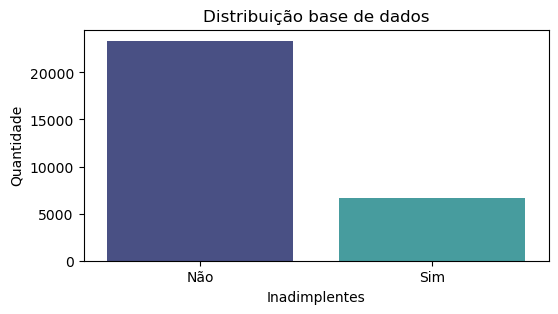

In [29]:
plt.figure(figsize=(6,3))
ax = sns.countplot(data = df, x= 'default.payment.next.month', palette='mako')
ax.set(ylabel='Quantidade', xlabel='Inadimplentes', title='Distribuição base de dados',  xticklabels = ['Não','Sim'])

plt.xticks()
plt.show()

In [30]:
df['default.payment.next.month'].value_counts(normalize=True)

default.payment.next.month
0    0.7788
1    0.2212
Name: proportion, dtype: float64

- 22.12% da base é composta por clientes inadimplêntes = Taxa de inadimplência

## 5.2 Distribuição variáveis contínuas

In [31]:
features_continuas = [i for i in df.columns if i not in features_categoricas and i not in var_target]
df_continua = df[ features_continuas + [var_target] ]
df_continua.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,perc_pago_fatura_4,perc_pago_fatura_5,perc_pago_fatura_6,saldo_devedor_1,saldo_devedor_2,saldo_devedor_3,saldo_devedor_4,saldo_devedor_5,saldo_devedor_6,default.payment.next.month
0,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,...,1.000000,1.000000,1.000000,3913.0,2413.0,689.0,0.0,0.0,0.0,1
1,120000.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,...,0.305623,0.000000,0.613309,2682.0,725.0,1682.0,2272.0,3455.0,1261.0,1
2,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,...,0.069779,0.066899,0.321564,27721.0,12527.0,12559.0,13331.0,13948.0,10549.0,0
3,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,...,0.038850,0.036914,0.033844,44990.0,46214.0,48091.0,27214.0,27890.0,28547.0,0
4,50000.0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,...,0.429799,0.035987,0.035492,6617.0,-31011.0,25835.0,11940.0,18457.0,18452.0,0


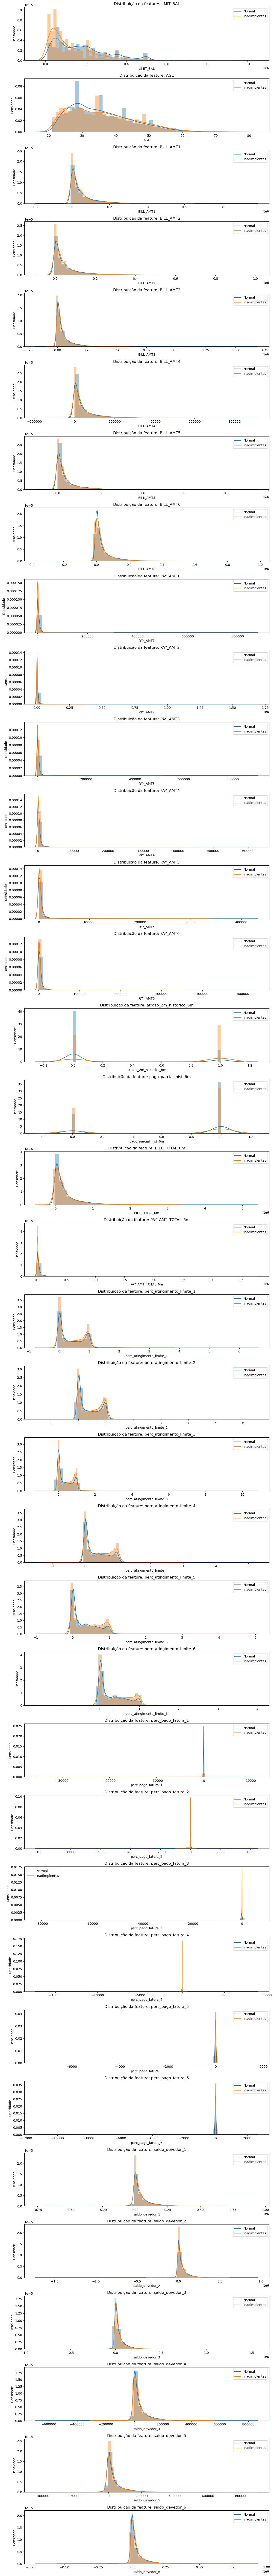

In [32]:
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings("ignore")

features = features_continuas

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(len(features), 1)

for i, cn in enumerate(df_continua[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df_continua[cn][df_continua[var_target] == 0], bins=50)
    sns.distplot(df_continua[cn][df_continua[var_target] == 1], bins=50)
    
    ## Eixos
    ax.set_xlabel(cn)
    ax.set_ylabel('Densidade')
    
    ## Titulo
    ax.set_title('Distribuição da feature: ' + str(cn))
    
    ## Legenda
    plt.legend(labels=["Normal","Inadimplentes"])
    
    ## Melhorar visualização
    plt.tight_layout()
    
plt.show()

Insights:

- Há mais inadimplentes no percentual de atingimento do limite próximo á 1
- Pessoas que atrasaram 2 meses de pagamento num historico de 6m são mais provaveis de ser inadimplentes.
- Há maior concentração de inadimplentes mais jovens e com limite baixo

## 5.3 Distribuição variáveis categóricas

In [33]:
df_categorica = df[features_categoricas + [var_target]]
df_categorica.head()

,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month
0,2,2,1,2,2,-1,-1,-2,-2,1
1,2,2,2,-1,2,0,0,0,2,1
2,2,2,2,0,0,0,0,0,0,0
3,2,2,1,0,0,0,0,0,0,0
4,1,2,1,-1,0,-1,0,0,0,0


In [34]:
for col in df_categorica.columns:
    df[col] = df[col].astype(str)

35
[3763. 2873.]
[18112. 11888.]
1
[14349.  9015.]
[18112. 11888.]


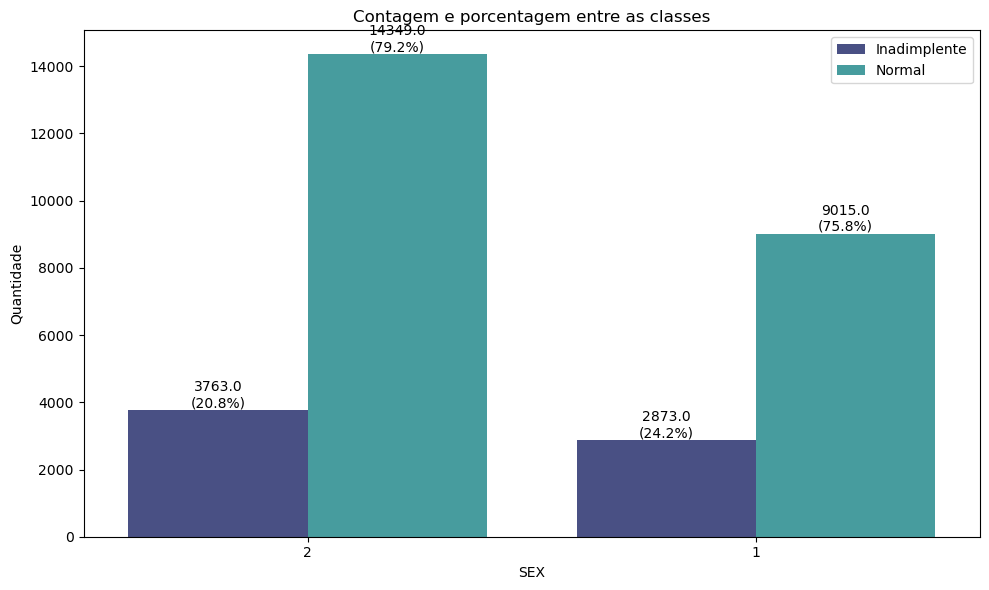

In [35]:
#for variavel in df_categorica.columns:
for variavel in ['SEX']:

    if variavel != var_target:

        # plot
        variavel_plot = variavel
        variavel_target = var_target
        plt.figure(figsize=(10,6))

        ax = sns.countplot( x=variavel_plot, hue=variavel_target, data=df, palette = 'mako')
        ax.set(ylabel='Quantidade', title='Contagem e porcentagem entre as classes')
          
        # get the total count of the type column
        total = 100
        
        ax.containers[0].datavalues ## valores target=1
        ax.containers[1].datavalues ## valores target=0
        subtotal_sexo =  ax.containers[1].datavalues + ax.containers[0].datavalues
        
        
        for c in ax.containers:
            print(i)
            print(c.datavalues)
            print(subtotal_sexo)

            labels = []
            for i, valor in enumerate(c.datavalues):
                labels.append(f'{valor}\n({valor/subtotal_sexo[i]*100:0.1f}%)')

            ax.bar_label(c, labels = labels)

        plt.legend(['Inadimplente', 'Normal'], fontsize = 10)
        plt.tight_layout()
        plt.show()

Insights em valores absolutos e relativos:

**1. Gênero:**
    - Há maior número de ocorrências de clientes inadimplentes do sexo feminino. No entanto, a maior taxa de inadimplência ocorre entre clientes do sexo masculino. (Necessário validar estatisticamente)
     
    
**2. Educação:**
    - Há maior número de ocorrências de clientes inadimplentes com ensino superior completo (2) , seguida por pós-graduação (1) e ensino médio (3) . No entanto, a maior taxa de inadimplência ocorre entre clientes que frequentaram o ensino médio (3), superior completo (2) e pós-graduação (1). (Necessário validar estatisticamente).
    
 
 **3. Estado Cívil:**
    - Há maior número de ocorrências de clientes inadimplentes com estado civil Solteiro (2) , seguida por casado (1) e Outros (3). No entanto, a maior taxa de inadimplência ocorre entre clientes com estado civil Outros (3), casado (1) e solteiro (2). (Necessário validar estatisticamente).
    
 **4. Atraso 2 meses na fatura:**
    - Há maior número de ocorrências de clientes inadimplentes, assim como maior taxa de inadimplência entre clientes que atrasaram a fatura em 2 meses. (Necessário validar estatisticamente).    
    
    
 **5. Pagamento Parcial**
    - Há maior número de ocorrências de clientes inadimplentes que pagaram a fatura parcialmente. No entanto, é maior a taxa de inadimplência entre clientes que efetuaram o pagamento total. (Necessário validar estatisticamente).

## 5.4 Analise bi-variada

### 5.4.1 Pairplots

In [36]:
#sns.pairplot(df, hue = var_target)
#plt.show()

- Exploraremos mais a fundo a análise bivariada com testes de hipoteses na seção abaixo

## 5.5 Testes de médias - Diferença de médias

### 5.5.1 Definições de funções: Técnica de bootstrapping

In [37]:
## Recebe 2 series data1 e data2, consolida o conjunto total de dados e faz 2 reamostragens aleatórias.

def sampling_bootstrap(data1,data2):
    
    ## Concatenacao dados
    data = np.concatenate((data1,data2))
    
    ## Permutacao dos dados
    permuted_data = np.random.permutation(data)
        
    ## Amostragem    
    sample1 = permuted_data[len(data1):] ## Primeira amostra do mesmo tamanho de data1
    sample2 = permuted_data[:len(data1)] ## Segunda amostra do mesmo tamanho de data2
    
    return sample1, sample2
    

In [38]:
## Recebe 2 series data1, data 2 cria um numero Size de replicatas da amostragem de bootstrap 
## e calcula uma função function para cada conjunto de 2 amostras.

def replicating_bootstrap(data1,data2,function,size=1):
    
    metrica_entre_samples = np.empty(size)
    
    for i in range(size):
        sample1, sample2 = sampling_bootstrap(data1,data2)
        
        ## Aplica a função ás duas amostras de bootstrap
        metrica_entre_samples[i] =  function(sample1,sample2)
        
    return metrica_entre_samples
        

In [39]:
## Calcula diferença entre a média de 2 amostras de bootstrap
def media_diff_2_amostras(sample1,sample2):
    media1 = np.mean(sample1)
    media2 = np.mean(sample2)
    
    diff = media1 - media2
    
    return diff

In [40]:
## Calcula p-valor entre a diferença da média empirica observada e a diferença da média de bootstrap em n simulações.

## P_Value: Qual a probabilidade da diferença da média empirica observada também ocorrer nas amostragens de bootstraps simuladas?
def p_value_bootstrap_and_empirical(data1,data2,n):
    
    ## Calculando a diferença da média empirica observada
    diff_empirica_medias_observadas = media_diff_2_amostras(data1,data2)

    ## Simulando n vezes a diferença da média observada em amostras de bootstrap.
    media_replicatas_bootstrap = replicating_bootstrap(data1,data2,media_diff_2_amostras,n)
    
    ## Quantas vezes a média de bootstrap foi superior á media empirica observada?
    n_ocorrencias_media_superior = np.sum(media_replicatas_bootstrap >= diff_empirica_medias_observadas)
    
    p_valor = n_ocorrencias_media_superior / n
    
    return p_valor

In [41]:
## Calcula intervalo de confiança dado alfa e métrica entre as amostras de bootstrap e tipo de teste bicaudal/mono.

def intervalo_confianca(metrica_entre_samples,alfa,tipo_teste):

    alfa_percentage = alfa*100
    
    if tipo_teste == 'bicaudal':
        alfa_aplicado = alfa_percentage/2
        complemento_alfa = 100 - alfa_aplicado
    else:
        alfa_aplicado = alfa_percentage
        complemento_alfa = 100 - alfa_aplicado
        
    confidence_interval = np.percentile(media_replicatas_bootstrap,[alfa_aplicado, complemento_alfa])
    limite_inferior_IV = confidence_interval[0]
    limite_superior_IV = confidence_interval[1]

    return limite_inferior_IV, limite_superior_IV

### H1: A taxa de inadimplência de clientes do sexo Masculino é maior em comparação aos clientes do sexo Feminino - VERDADEIRO

In [42]:
for col in df_categorica.columns:
    df[col] = df[col].astype(int)

In [43]:
masc = df[(df['SEX']==1)][var_target] ##Grupo 1
fem = df[(df['SEX']==2)][var_target]  ##Grupo 2

grupo1 = masc
grupo2 = fem

print("A média do grupo 1 é {} e do grupo 2 é {}".format(grupo1.mean(), grupo2.mean()))

diff_empirica_medias_observadas = media_diff_2_amostras(grupo1,grupo2)

print("Há uma diferença média absoluta de {} na taxa de inadimplência entre os dois grupos".format(diff_empirica_medias_observadas))

A média do grupo 1 é 0.2416722745625841 e do grupo 2 é 0.20776280918727916
Há uma diferença média absoluta de 0.033909465375304954 na taxa de inadimplência entre os dois grupos


##### Teste

- H0: Não há diferença nas medias entre os grupos
- H1: Há diferença entre as médias dos grupos

In [44]:
n_simulacoes = 1000
alfa = 0.05
nivel_confianca = (1-alfa)*100


media_replicatas_bootstrap = replicating_bootstrap(grupo1,grupo2,media_diff_2_amostras,n_simulacoes)
p_valor = p_value_bootstrap_and_empirical(grupo1,grupo2,n_simulacoes)

alfa = 0.05
nivel_confianca = (1-alfa)*100

# P-valor denota a probabilidade de ocorrer os eventos observados das amostras empiricas nas amostras de bootstrap
# Ou seja, reflete a proporção de vezes em que os valores observados nas amostras empiricas ocorreram.
# Dessa forma, altos valores de p corroboram para rejeição da hipotese nula.

print("")
print("===================RESULTADO TESTES===================")
print("")

if p_valor < alfa:
    print("Hipotese nula rejeitada. Ou seja, há diferença estatística significante entre os grupos com {}% de nivel de confianca".format(nivel_confianca))
    print("P-valor = {}".format(p_valor))
    resultado_teste = "Hipotese nula rejeitada. Ou seja, há diferença estatística significante entre os grupos com " + str(nivel_confianca) + "% de nivel de confianca.\n P-valor = " + str(p_valor) 
    
else:
    print("P-valor = {}".format(p_valor))
    print("A hipotese nula não pode ser rejeitada. Ou seja, não há diferença estatística significante entre os grupos com {}% de nivel de confianca".format(nivel_confianca))
    resultado_teste = "A hipotese nula não pode ser rejeitada. Ou seja, não há diferença estatística significante entre os grupos com " + str(nivel_confianca) + "% de nivel de confianca.\n P-valor = " + str(p_valor) 


===================RESULTADO TESTES===================

Hipotese nula rejeitada. Ou seja, há diferença estatística significante entre os grupos com 95.0% de nivel de confianca
P-valor = 0.0


##### Plot

In [45]:
tipo_teste = 'bicaudal' ## bicaudal ou monocaudal'

limite_inferior_IV, limite_superior_IV = intervalo_confianca(media_replicatas_bootstrap,alfa, tipo_teste)
print(" Intervalo de confianca: de {} á {}".format(limite_inferior_IV, limite_superior_IV ))

 Intervalo de confianca: de -0.008976280829556442 á 0.009979627286951454


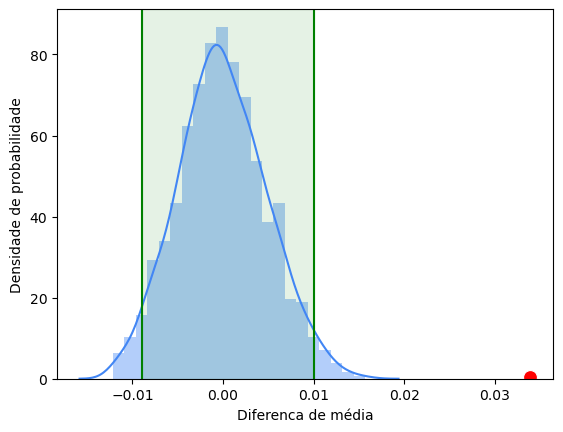

In [46]:
palette = sns.color_palette(['#4286f4','#f44141'])


axs = sns.distplot(media_replicatas_bootstrap, color = palette[0])

axs.axvline(limite_inferior_IV, color = 'green')
axs.axvline(limite_superior_IV, color = 'green')

axs.axvspan(limite_inferior_IV,limite_superior_IV , color = 'green', alpha = 0.1)

axs.set_ylabel('Densidade de probabilidade')
axs.set_xlabel('Diferenca de média')

axs = sns.scatterplot(x = np.array([diff_empirica_medias_observadas]), y = 0.5, s = 100, color = 'red')

Text(0.015, 0.033909465375304954, '0.034')

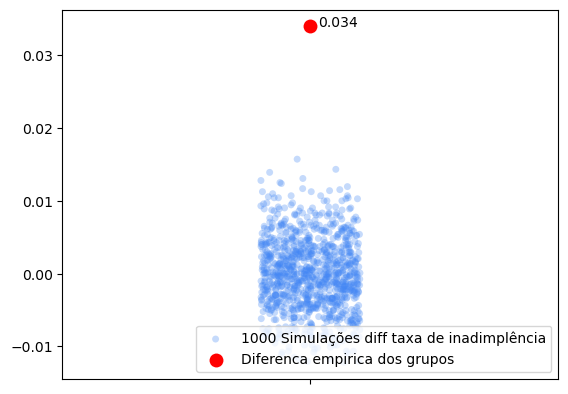

In [47]:
axs = sns.stripplot(y = media_replicatas_bootstrap, alpha = 0.3, palette = palette,
                   label = (str(n_simulacoes) + ' Simulações diff taxa de inadimplência'))
axs = sns.swarmplot(y = np.array([diff_empirica_medias_observadas]), color = 'red', size = 10, label = 'Diferenca empirica dos grupos')
axs.legend(loc='lower right')
axs.set_ylabel = ('Diferenca de taxa de inadimplencia')

diff_media_empirica_arredondada = round(diff_empirica_medias_observadas,3)
axs.annotate(str(diff_media_empirica_arredondada), xy=[0.015,diff_empirica_medias_observadas])

In [48]:
print(resultado_teste)

Hipotese nula rejeitada. Ou seja, há diferença estatística significante entre os grupos com 95.0% de nivel de confianca.
 P-valor = 0.0


### H2: A taxa de inadimplência de clientes que tem apenas o ensino médio completo é maior em comparação aos outros clientes - VERDADEIRO

#### Teste

- H0: Não há diferença nas medias entre os grupos
- H1: Há diferença entre as médias dos grupos

In [49]:
## Definicao dos grupos
ensino_medio = df[(df['EDUCATION']==3)][var_target] ##Grupo 1
outros = df[(df['EDUCATION']!=3)][var_target]  ##Grupo 2

grupo1 = ensino_medio
grupo2 = outros

## Dados para simulacoes
n_simulacoes = 1000
alfa = 0.05
nivel_confianca = (1-alfa)*100




###################### Diferença entre os grupos
diff_empirica_medias_observadas = media_diff_2_amostras(grupo1,grupo2)
print("A média de {} registros do grupo 1 é {} e a média de {} registros do grupo 2 é {}".format(len(grupo1), grupo1.mean(), len(grupo2), grupo2.mean()))
print("Há uma diferença média absoluta de {} na taxa de inadimplência entre os dois grupos".format(diff_empirica_medias_observadas))


###################### TESTE
n_simulacoes = 1000
alfa = 0.05
nivel_confianca = (1-alfa)*100


media_replicatas_bootstrap = replicating_bootstrap(grupo1,grupo2,media_diff_2_amostras,n_simulacoes)
p_valor = p_value_bootstrap_and_empirical(grupo1,grupo2,n_simulacoes)

alfa = 0.05
nivel_confianca = (1-alfa)*100

# P-valor denota a probabilidade de ocorrer os eventos observados das amostras empiricas nas amostras de bootstrap
# Ou seja, reflete a proporção de vezes em que os valores observados nas amostras empiricas ocorreram.
# Dessa forma, altos valores de p corroboram para rejeição da hipotese nula.

print("")
print("===================RESULTADO TESTES===================")
print("")

if p_valor < alfa:
    print("Hipotese nula rejeitada. Ou seja, há diferença estatística significante entre os grupos com {}% de nivel de confianca".format(nivel_confianca))
    print("P-valor = {}".format(p_valor))
    resultado_teste = "Hipotese nula rejeitada. Ou seja, há diferença estatística significante entre os grupos com " + str(nivel_confianca) + "% de nivel de confianca.\n P-valor = " + str(p_valor) 
    
else:
    print("P-valor = {}".format(p_valor))
    print("A hipotese nula não pode ser rejeitada. Ou seja, não há diferença estatística significante entre os grupos com {}% de nivel de confianca".format(nivel_confianca))
    resultado_teste = "A hipotese nula não pode ser rejeitada. Ou seja, não há diferença estatística significante entre os grupos com " + str(nivel_confianca) + "% de nivel de confianca.\n P-valor = " + str(p_valor) 

A média de 4917 registros do grupo 1 é 0.2515761643278422 e a média de 25083 registros do grupo 2 é 0.21524538532073517
Há uma diferença média absoluta de 0.03633077900710702 na taxa de inadimplência entre os dois grupos

===================RESULTADO TESTES===================

Hipotese nula rejeitada. Ou seja, há diferença estatística significante entre os grupos com 95.0% de nivel de confianca
P-valor = 0.0


#### Plots

 Intervalo de confianca: de -0.012742222970439789 á 0.012810525796272178


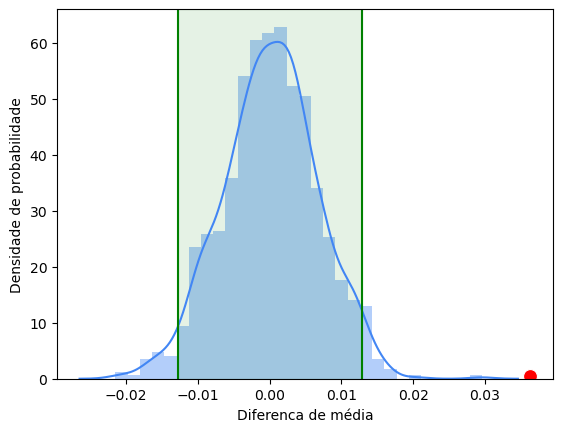

In [50]:
##################### PLOT EVIDÊNCIAS.
tipo_teste = 'bicaudal' ## bicaudal ou monocaudal'

limite_inferior_IV, limite_superior_IV = intervalo_confianca(media_replicatas_bootstrap,alfa, tipo_teste)
print(" Intervalo de confianca: de {} á {}".format(limite_inferior_IV, limite_superior_IV ))


######### PLOT 1 - DISTRIBUIÇÃO
palette = sns.color_palette(['#4286f4','#f44141'])


axs = sns.distplot(media_replicatas_bootstrap, color = palette[0])

axs.axvline(limite_inferior_IV, color = 'green')
axs.axvline(limite_superior_IV, color = 'green')

axs.axvspan(limite_inferior_IV,limite_superior_IV , color = 'green', alpha = 0.1)

axs.set_ylabel('Densidade de probabilidade')
axs.set_xlabel('Diferenca de média')

axs = sns.scatterplot(x = np.array([diff_empirica_medias_observadas]), y = 0.5, s = 100, color = 'red')

Text(0.015, 0.03633077900710702, '0.036')

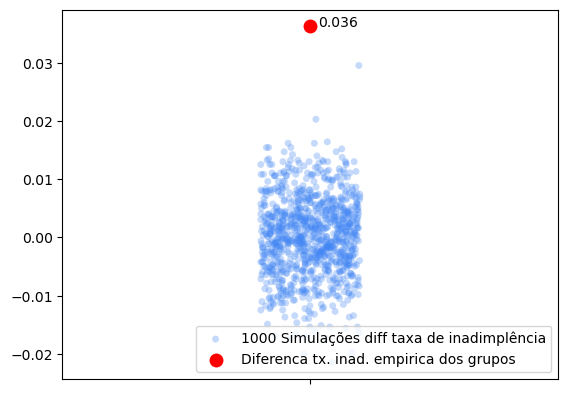

In [51]:
######### PLOT 2 - SWARM
axs2 = sns.stripplot(y = media_replicatas_bootstrap, alpha = 0.3, palette = palette,
                   label = (str(n_simulacoes) + ' Simulações diff taxa de inadimplência'))
axs2 = sns.swarmplot(y = np.array([diff_empirica_medias_observadas]), color = 'red', size = 10, label = 'Diferenca tx. inad. empirica dos grupos')
axs2.legend(loc='lower right')
axs2.set_ylabel = ('Diferenca de taxa de inadimplencia')

diff_media_empirica_arredondada = round(diff_empirica_medias_observadas,3)
axs2.annotate(str(diff_media_empirica_arredondada), xy=[0.015,diff_empirica_medias_observadas])

In [52]:
print(resultado_teste)

Hipotese nula rejeitada. Ou seja, há diferença estatística significante entre os grupos com 95.0% de nivel de confianca.
 P-valor = 0.0


### H3: A taxa de inadimplência de clientes com estado civil "Outros" é maior em comparação aos outros clientes - FALSO

#### Teste

- H0: Não há diferença nas medias entre os grupos
- H1: Há diferença entre as médias dos grupos

In [53]:
## Definicao dos grupos
estado_outros = df[(df['MARRIAGE']==3)][var_target]  ##Grupo 2
estado_restante = df[(df['MARRIAGE']!=3)][var_target] ##Grupo 1

grupo1 = estado_outros
grupo2 = estado_restante


## Dados para simulacoes
n_simulacoes = 1000
alfa = 0.05
nivel_confianca = (1-alfa)*100




###################### Diferença entre os grupos
diff_empirica_medias_observadas = media_diff_2_amostras(grupo1,grupo2)
print("A média de {} registros do grupo 1 é {} e a média de {} registros do grupo 2 é {}".format(len(grupo1), grupo1.mean(), len(grupo2), grupo2.mean()))
print("Há uma diferença média absoluta de {} na taxa de inadimplência entre os dois grupos".format(diff_empirica_medias_observadas))


###################### TESTE
n_simulacoes = 1000
alfa = 0.05
nivel_confianca = (1-alfa)*100


media_replicatas_bootstrap = replicating_bootstrap(grupo1,grupo2,media_diff_2_amostras,n_simulacoes)
p_valor = p_value_bootstrap_and_empirical(grupo1,grupo2,n_simulacoes)

alfa = 0.05
nivel_confianca = (1-alfa)*100

# P-valor denota a probabilidade de ocorrer os eventos observados das amostras empiricas nas amostras de bootstrap
# Ou seja, reflete a proporção de vezes em que os valores observados nas amostras empiricas ocorreram.
# Dessa forma, altos valores de p corroboram para rejeição da hipotese nula.

print("")
print("===================RESULTADO TESTES===================")
print("")

if p_valor < alfa:
    print("Hipotese nula rejeitada. Ou seja, há diferença estatística significante entre os grupos com {}% de nivel de confianca".format(nivel_confianca))
    print("P-valor = {}".format(p_valor))
    resultado_teste = "Hipotese nula rejeitada. Ou seja, há diferença estatística significante entre os grupos com " + str(nivel_confianca) + "% de nivel de confianca.\n P-valor = " + str(p_valor) 
    
else:
    print("P-valor = {}".format(p_valor))
    print("A hipotese nula não pode ser rejeitada. Ou seja, não há diferença estatística significante entre os grupos com {}% de nivel de confianca".format(nivel_confianca))
    resultado_teste = "A hipotese nula não pode ser rejeitada. Ou seja, não há diferença estatística significante entre os grupos com " + str(nivel_confianca) + "% de nivel de confianca.\n P-valor = " + str(p_valor) 

A média de 323 registros do grupo 1 é 0.26006191950464397 e a média de 29677 registros do grupo 2 é 0.22077703271894059
Há uma diferença média absoluta de 0.03928488678570338 na taxa de inadimplência entre os dois grupos

===================RESULTADO TESTES===================

Hipotese nula rejeitada. Ou seja, há diferença estatística significante entre os grupos com 95.0% de nivel de confianca
P-valor = 0.031


#### Plots

 Intervalo de confianca: de -0.0455442295067294 á 0.04834591130866059


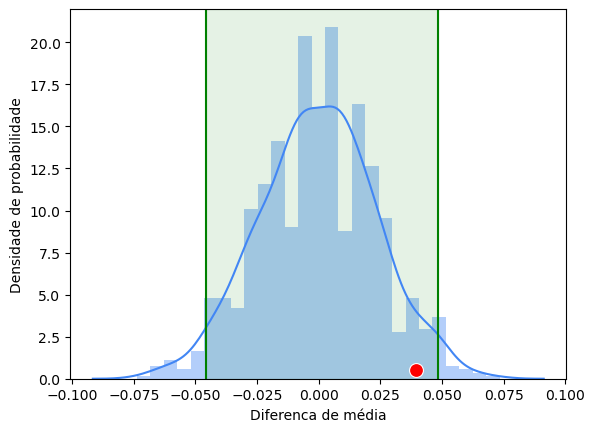

In [54]:
##################### PLOT EVIDÊNCIAS.
tipo_teste = 'bicaudal' ## bicaudal ou monocaudal'

limite_inferior_IV, limite_superior_IV = intervalo_confianca(media_replicatas_bootstrap,alfa, tipo_teste)
print(" Intervalo de confianca: de {} á {}".format(limite_inferior_IV, limite_superior_IV ))


######### PLOT 1 - DISTRIBUIÇÃO
palette = sns.color_palette(['#4286f4','#f44141'])


axs = sns.distplot(media_replicatas_bootstrap, color = palette[0])

axs.axvline(limite_inferior_IV, color = 'green')
axs.axvline(limite_superior_IV, color = 'green')

axs.axvspan(limite_inferior_IV,limite_superior_IV , color = 'green', alpha = 0.1)

axs.set_ylabel('Densidade de probabilidade')
axs.set_xlabel('Diferenca de média')

axs = sns.scatterplot(x = np.array([diff_empirica_medias_observadas]), y = 0.5, s = 100, color = 'red')

Text(0.015, 0.03928488678570338, '0.039')

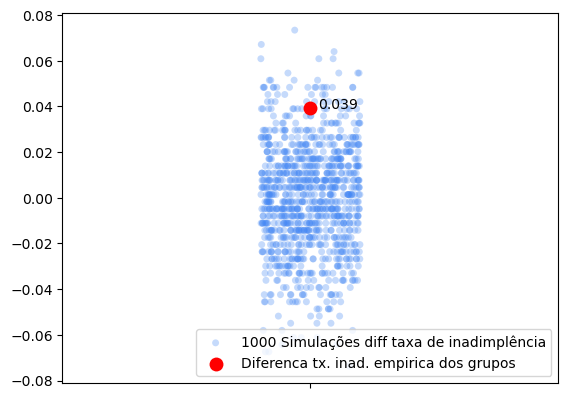

In [55]:
######### PLOT 2 - SWARM
axs2 = sns.stripplot(y = media_replicatas_bootstrap, alpha = 0.3, palette = palette,
                   label = (str(n_simulacoes) + ' Simulações diff taxa de inadimplência'))
axs2 = sns.swarmplot(y = np.array([diff_empirica_medias_observadas]), color = 'red', size = 10, label = 'Diferenca tx. inad. empirica dos grupos')
axs2.legend(loc='lower right')
axs2.set_ylabel = ('Diferenca de taxa de inadimplencia')

diff_media_empirica_arredondada = round(diff_empirica_medias_observadas,3)
axs2.annotate(str(diff_media_empirica_arredondada), xy=[0.015,diff_empirica_medias_observadas])

In [56]:
print(resultado_teste)

Hipotese nula rejeitada. Ou seja, há diferença estatística significante entre os grupos com 95.0% de nivel de confianca.
 P-valor = 0.031


### H4: A taxa de inadimplência de clientes com estado civil "Casado" é maior em comparação aos outros clientes - VERDADEIRO

#### Teste

- H0: Não há diferença nas medias entre os grupos
- H1: Há diferença entre as médias dos grupos

In [57]:
## Definicao dos grupos
estado_casado = df[(df['MARRIAGE']==1)][var_target]  ##Grupo 2
estado_restante = df[(df['MARRIAGE']!=1)][var_target] ##Grupo 1


grupo1 = estado_casado
grupo2 = estado_restante


## Dados para simulacoes
n_simulacoes = 1000
alfa = 0.05
nivel_confianca = (1-alfa)*100




###################### Diferença entre os grupos
diff_empirica_medias_observadas = media_diff_2_amostras(grupo1,grupo2)
print("A média de {} registros do grupo 1 é {} e a média de {} registros do grupo 2 é {}".format(len(grupo1), grupo1.mean(), len(grupo2), grupo2.mean()))
print("Há uma diferença média absoluta de {} na taxa de inadimplência entre os dois grupos".format(diff_empirica_medias_observadas))


###################### TESTE
n_simulacoes = 1000
alfa = 0.05
nivel_confianca = (1-alfa)*100


media_replicatas_bootstrap = replicating_bootstrap(grupo1,grupo2,media_diff_2_amostras,n_simulacoes)
p_valor = p_value_bootstrap_and_empirical(grupo1,grupo2,n_simulacoes)

alfa = 0.05
nivel_confianca = (1-alfa)*100

# P-valor denota a probabilidade de ocorrer os eventos observados das amostras empiricas nas amostras de bootstrap
# Ou seja, reflete a proporção de vezes em que os valores observados nas amostras empiricas ocorreram.
# Dessa forma, altos valores de p corroboram para rejeição da hipotese nula.

print("")
print("===================RESULTADO TESTES===================")
print("")

if p_valor < alfa:
    print("Hipotese nula rejeitada. Ou seja, há diferença estatística significante entre os grupos com {}% de nivel de confianca".format(nivel_confianca))
    print("P-valor = {}".format(p_valor))
    resultado_teste = "Hipotese nula rejeitada. Ou seja, há diferença estatística significante entre os grupos com " + str(nivel_confianca) + "% de nivel de confianca.\n P-valor = " + str(p_valor) 
    
else:
    print("P-valor = {}".format(p_valor))
    print("A hipotese nula não pode ser rejeitada. Ou seja, não há diferença estatística significante entre os grupos com {}% de nivel de confianca".format(nivel_confianca))
    resultado_teste = "A hipotese nula não pode ser rejeitada. Ou seja, não há diferença estatística significante entre os grupos com " + str(nivel_confianca) + "% de nivel de confianca.\n P-valor = " + str(p_valor) 

A média de 13659 registros do grupo 1 é 0.23471703638626545 e a média de 16341 registros do grupo 2 é 0.2099014748179426
Há uma diferença média absoluta de 0.024815561568322847 na taxa de inadimplência entre os dois grupos

===================RESULTADO TESTES===================

Hipotese nula rejeitada. Ou seja, há diferença estatística significante entre os grupos com 95.0% de nivel de confianca
P-valor = 0.0


#### Plots

 Intervalo de confianca: de -0.00922428379684656 á 0.0093239604485304


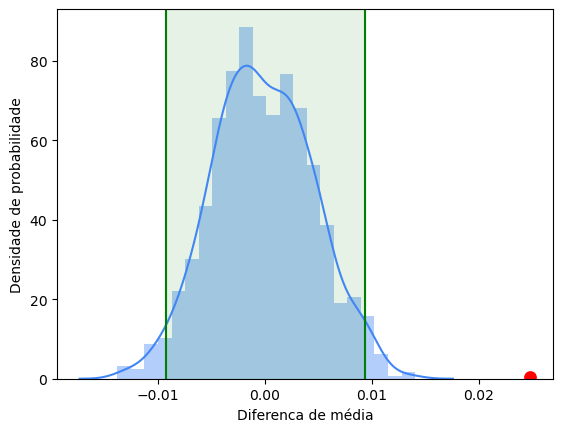

In [58]:
##################### PLOT EVIDÊNCIAS.
tipo_teste = 'bicaudal' ## bicaudal ou monocaudal'

limite_inferior_IV, limite_superior_IV = intervalo_confianca(media_replicatas_bootstrap,alfa, tipo_teste)
print(" Intervalo de confianca: de {} á {}".format(limite_inferior_IV, limite_superior_IV ))


######### PLOT 1 - DISTRIBUIÇÃO
palette = sns.color_palette(['#4286f4','#f44141'])


axs = sns.distplot(media_replicatas_bootstrap, color = palette[0])

axs.axvline(limite_inferior_IV, color = 'green')
axs.axvline(limite_superior_IV, color = 'green')

axs.axvspan(limite_inferior_IV,limite_superior_IV , color = 'green', alpha = 0.1)

axs.set_ylabel('Densidade de probabilidade')
axs.set_xlabel('Diferenca de média')

axs = sns.scatterplot(x = np.array([diff_empirica_medias_observadas]), y = 0.5, s = 100, color = 'red')

Text(0.015, 0.024815561568322847, '0.025')

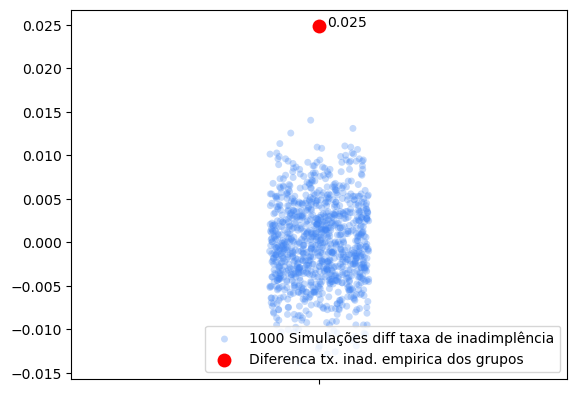

In [59]:
######### PLOT 2 - SWARM
axs2 = sns.stripplot(y = media_replicatas_bootstrap, alpha = 0.3, palette = palette,
                   label = (str(n_simulacoes) + ' Simulações diff taxa de inadimplência'))
axs2 = sns.swarmplot(y = np.array([diff_empirica_medias_observadas]), color = 'red', size = 10, label = 'Diferenca tx. inad. empirica dos grupos')
axs2.legend(loc='lower right')
axs2.set_ylabel = ('Diferenca de taxa de inadimplencia')

diff_media_empirica_arredondada = round(diff_empirica_medias_observadas,3)
axs2.annotate(str(diff_media_empirica_arredondada), xy=[0.015,diff_empirica_medias_observadas])

In [60]:
print(resultado_teste)

Hipotese nula rejeitada. Ou seja, há diferença estatística significante entre os grupos com 95.0% de nivel de confianca.
 P-valor = 0.0


### H5: A taxa de inadimplência de clientes que atrasaram a fatura em 2 meses é maior em comparação aos clientes que não atrasaram - VERDADEIRO

#### Teste

- H0: Não há diferença nas medias entre os grupos
- H1: Há diferença entre as médias dos grupos

In [61]:
## Definicao dos grupos
atrasaram = df[(df['atraso_2m_historico_6m']==1)][var_target]  ##Grupo 2
nao_atrasaram = df[(df['atraso_2m_historico_6m']!=1)][var_target] ##Grupo 1


grupo1 = atrasaram
grupo2 = nao_atrasaram


## Dados para simulacoes
n_simulacoes = 1000
alfa = 0.05
nivel_confianca = (1-alfa)*100




###################### Diferença entre os grupos
diff_empirica_medias_observadas = media_diff_2_amostras(grupo1,grupo2)
print("A média de {} registros do grupo 1 é {} e a média de {} registros do grupo 2 é {}".format(len(grupo1), grupo1.mean(), len(grupo2), grupo2.mean()))
print("Há uma diferença média absoluta de {} na taxa de inadimplência entre os dois grupos".format(diff_empirica_medias_observadas))


###################### TESTE
n_simulacoes = 1000
alfa = 0.05
nivel_confianca = (1-alfa)*100


media_replicatas_bootstrap = replicating_bootstrap(grupo1,grupo2,media_diff_2_amostras,n_simulacoes)
p_valor = p_value_bootstrap_and_empirical(grupo1,grupo2,n_simulacoes)

alfa = 0.05
nivel_confianca = (1-alfa)*100

# P-valor denota a probabilidade de ocorrer os eventos observados das amostras empiricas nas amostras de bootstrap
# Ou seja, reflete a proporção de vezes em que os valores observados nas amostras empiricas ocorreram.
# Dessa forma, altos valores de p corroboram para rejeição da hipotese nula.

print("")
print("===================RESULTADO TESTES===================")
print("")

if p_valor < alfa:
    print("Hipotese nula rejeitada. Ou seja, há diferença estatística significante entre os grupos com {}% de nivel de confianca".format(nivel_confianca))
    print("P-valor = {}".format(p_valor))
    resultado_teste = "Hipotese nula rejeitada. Ou seja, há diferença estatística significante entre os grupos com " + str(nivel_confianca) + "% de nivel de confianca.\n P-valor = " + str(p_valor) 
    
else:
    print("P-valor = {}".format(p_valor))
    print("A hipotese nula não pode ser rejeitada. Ou seja, não há diferença estatística significante entre os grupos com {}% de nivel de confianca".format(nivel_confianca))
    resultado_teste = "A hipotese nula não pode ser rejeitada. Ou seja, não há diferença estatística significante entre os grupos com " + str(nivel_confianca) + "% de nivel de confianca.\n P-valor = " + str(p_valor) 

A média de 8320 registros do grupo 1 é 0.46298076923076925 e a média de 21680 registros do grupo 2 é 0.12841328413284134
Há uma diferença média absoluta de 0.3345674850979279 na taxa de inadimplência entre os dois grupos

===================RESULTADO TESTES===================

Hipotese nula rejeitada. Ou seja, há diferença estatística significante entre os grupos com 95.0% de nivel de confianca
P-valor = 0.0


#### Plots

 Intervalo de confianca: de -0.010584629133550929 á 0.01038388358643201


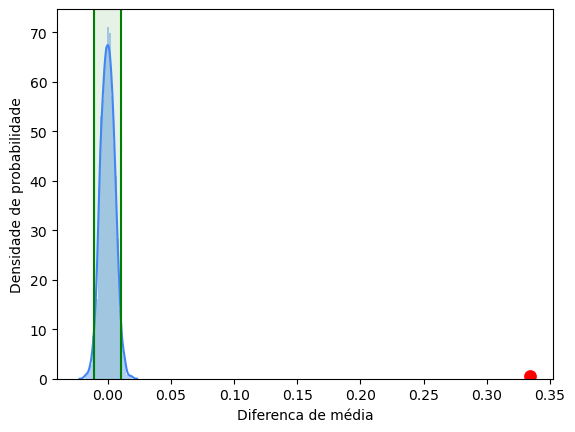

In [62]:
##################### PLOT EVIDÊNCIAS.
tipo_teste = 'bicaudal' ## bicaudal ou monocaudal'

limite_inferior_IV, limite_superior_IV = intervalo_confianca(media_replicatas_bootstrap,alfa, tipo_teste)
print(" Intervalo de confianca: de {} á {}".format(limite_inferior_IV, limite_superior_IV ))


######### PLOT 1 - DISTRIBUIÇÃO
palette = sns.color_palette(['#4286f4','#f44141'])


axs = sns.distplot(media_replicatas_bootstrap, color = palette[0])

axs.axvline(limite_inferior_IV, color = 'green')
axs.axvline(limite_superior_IV, color = 'green')

axs.axvspan(limite_inferior_IV,limite_superior_IV , color = 'green', alpha = 0.1)

axs.set_ylabel('Densidade de probabilidade')
axs.set_xlabel('Diferenca de média')

axs = sns.scatterplot(x = np.array([diff_empirica_medias_observadas]), y = 0.5, s = 100, color = 'red')

Text(0.015, 0.3345674850979279, '0.335')

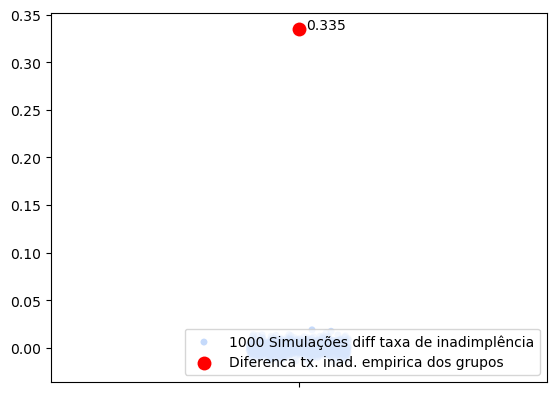

In [63]:
######### PLOT 2 - SWARM
axs2 = sns.stripplot(y = media_replicatas_bootstrap, alpha = 0.3, palette = palette,
                   label = (str(n_simulacoes) + ' Simulações diff taxa de inadimplência'))
axs2 = sns.swarmplot(y = np.array([diff_empirica_medias_observadas]), color = 'red', size = 10, label = 'Diferenca tx. inad. empirica dos grupos')
axs2.legend(loc='lower right')
axs2.set_ylabel = ('Diferenca de taxa de inadimplencia')

diff_media_empirica_arredondada = round(diff_empirica_medias_observadas,3)
axs2.annotate(str(diff_media_empirica_arredondada), xy=[0.015,diff_empirica_medias_observadas])

In [64]:
print(resultado_teste)

Hipotese nula rejeitada. Ou seja, há diferença estatística significante entre os grupos com 95.0% de nivel de confianca.
 P-valor = 0.0


# 6 AMOSTRAGEM ESTRATIFICADA

## 6.1 Separação dados de teste

Reservaremos 20% dos dados para testes respeitando as proporções de exemplos de clientes inadimplentes/normais da base total

In [65]:
from sklearn.model_selection import train_test_split

X = df.drop([var_target], axis=1)
y = df[var_target]

X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
y_test.value_counts()

default.payment.next.month
0    4673
1    1327
Name: count, dtype: int64

## 6.2 Separação dados de validação e treino

Reservaremos 20% dos dados de treino/valid para validação respeitando as proporções de exemplos de clientes inadimplentes/normais da base total

In [66]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid,test_size=0.2,random_state = 0, stratify = y_train_valid)
y_valid.value_counts()

default.payment.next.month
0    3738
1    1062
Name: count, dtype: int64

# 7 SELECAO DE FEATURES

- Para todos os métodos aplicados, utilizaremos a base de TESTES para selecionar as variáveis.

## 7.1 Correlação de Pearson

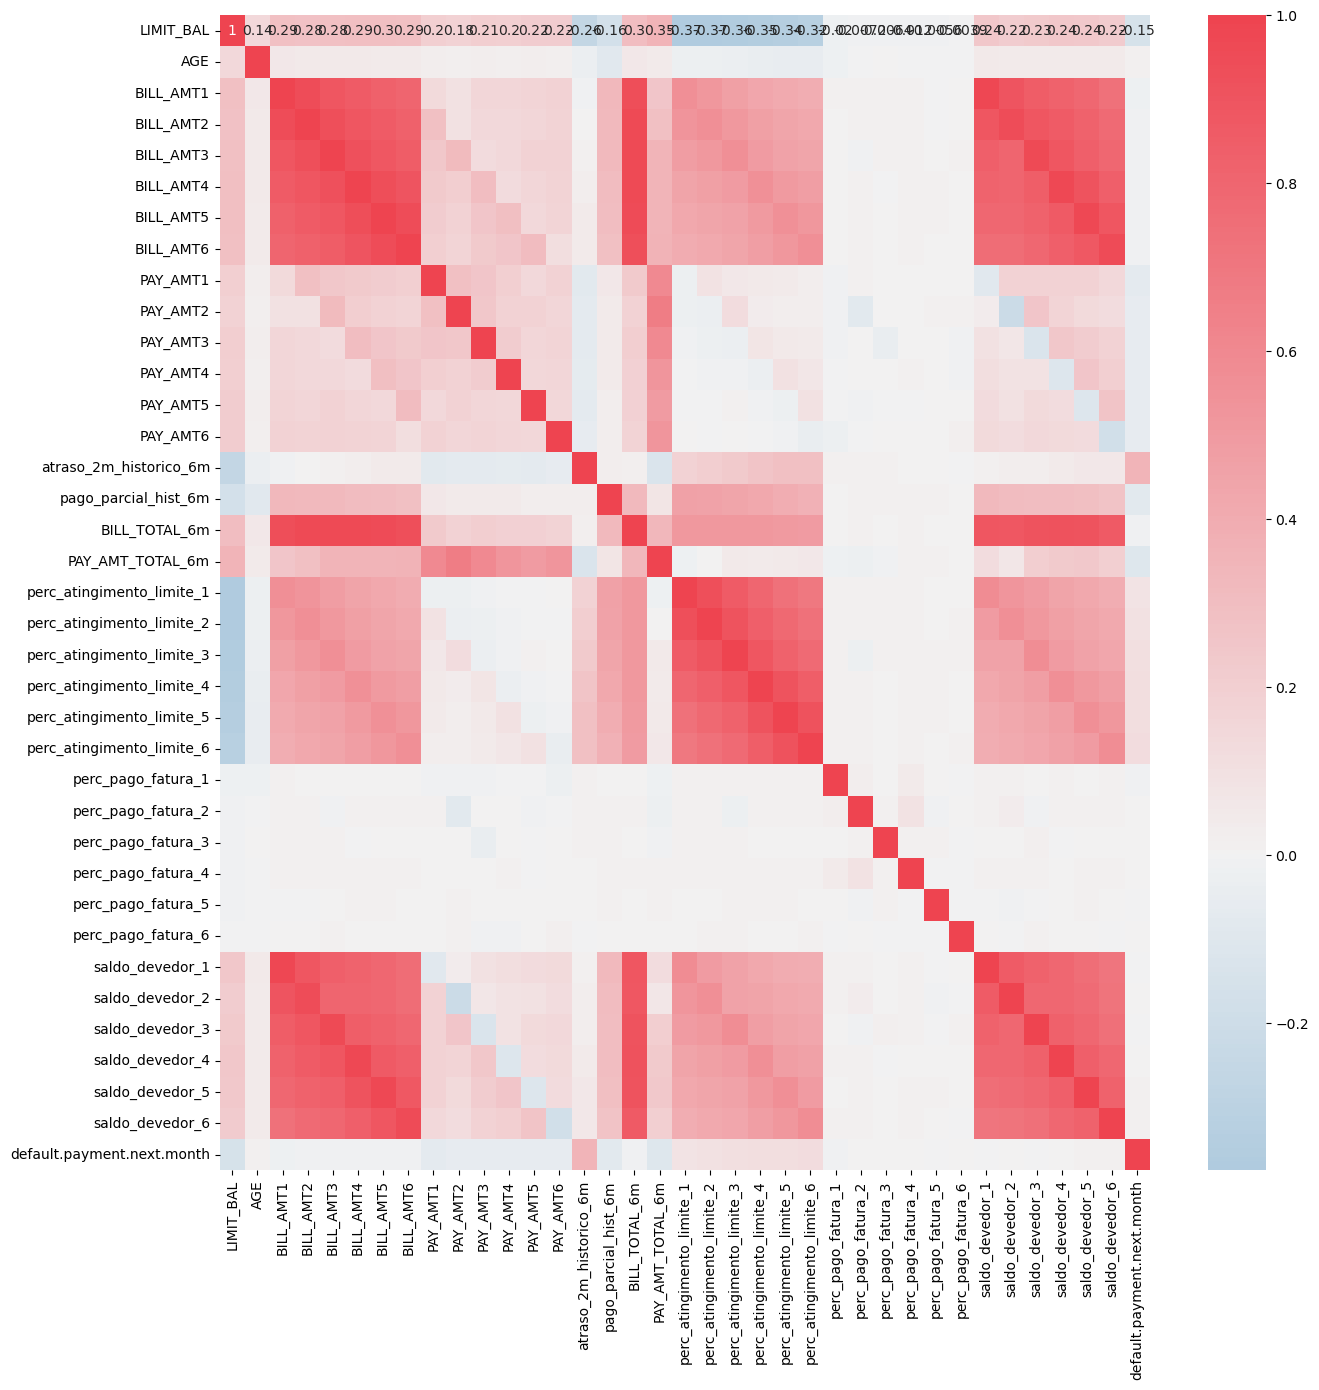

In [67]:
plt.figure(figsize=(15,15))
cmap = sns.diverging_palette(240, 10, s=80, l=55, n=9, as_cmap=True)
sns.heatmap(df_continua.corr(),annot=True, cmap=cmap, center=0)
plt.show()

De acordo com a tabela de referência abaixo:

| Correlação | Interpretacao   |
|------|------|
|   0.00 | Ausência de correlação|
|   0.01 a 0.019 | Correlação muito fraca|
|   0.20 a 0.39| Correlação fraca|
|   0.4 a 0.69 | Correlação moderada|
|   0.7 a 0.89 | Correlação forte|
|   0.9 a 0.99 | Correlação muito forte|
|   1.00 | Correlação perfeita|


## 7.2 Features Importance - Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
## Model
clf = RandomForestClassifier(random_state=1, n_jobs=-1)

##Fit
clf.fit(X_test,y_test)

## Variaveis para plotar
features_names = X.columns.tolist()
class_names = ['Normal','Inadimplente']

In [70]:
feature_imp = pd.Series(clf.feature_importances_,index=features_names).sort_values(ascending=False)

### Plot

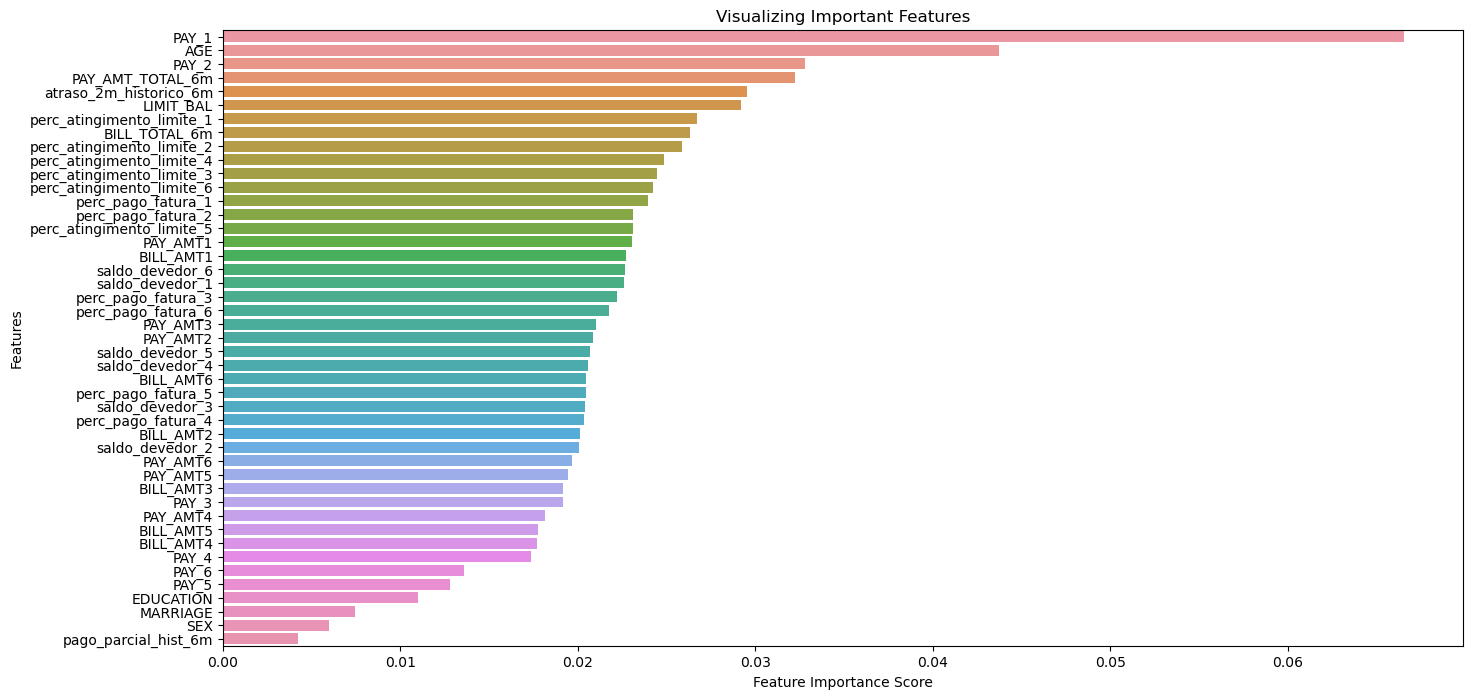

In [71]:
def visualiza_features_importantes(features_lista):
    %matplotlib inline

    plt.figure(figsize=(16,8))
    sns.barplot(x=features_lista, y=features_lista.index)

    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()
    
visualiza_features_importantes(feature_imp)

### Ranking Features

In [72]:
ranking_features = []

for num, importance in enumerate(feature_imp):
    ranking = num+1
    nome_feature = feature_imp.index[num]
    importance = importance
    
    ranking_features.append(np.array( [ranking,nome_feature,importance] ) )

ranking_features_df = pd.DataFrame(np.array(ranking_features), columns=['Rank','Feature','Importance'])
ranking_features_df

,Rank,Feature,Importance
0,1,PAY_1,0.06655086611683327
1,2,AGE,0.043713452697504714
2,3,PAY_2,0.03281074758991919
3,4,PAY_AMT_TOTAL_6m,0.03225965957805097
4,5,atraso_2m_historico_6m,0.029515282822444613
5,6,LIMIT_BAL,0.02919419825501023
6,7,perc_atingimento_limite_1,0.026727235814858908
7,8,BILL_TOTAL_6m,0.02631914902043735
8,9,perc_atingimento_limite_2,0.02589031138297962
9,10,perc_atingimento_limite_4,0.02483912041871907


## 7.3 Information Value (IV)

Information Value é uma técnica para avaliar a separabilidade das classes em variáveis categóricas mensurando a relação de eventos e não eventos para cada categoria.

É possível aplicá-la também em variáveis contínuas, aplicando, para isso uma discretização antes.

A fim de facilitar sua implementação, aplicaremos a técnica com auxílio da biblioteca [XVerse](https://github.com/Sundar0989/XuniVerse). Essa biblioteca tenta discretizar as variáveis contínuas selecionando a quantidade de bins de forma a deixar a taxa de eventos/nao eventos crescente ou decrescente.

- Requer pandas 1.3.5

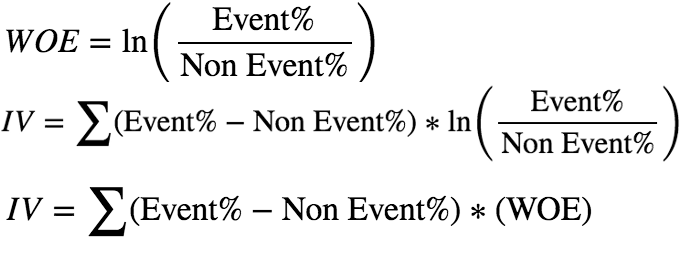

In [73]:
from IPython.display import Image
Image("../references/IV_Formula.png")

In [74]:
##from xverse.transformer import MonotonicBinning

###clf = MonotonicBinning()
###clf.fit(X_test, y_test)

#print(clf.bins)
##output_bins = clf.bins #will be used later in this exercise

In [75]:
#clf = MonotonicBinning(custom_binning=output_bins) #output_bins was created earlier

#out_X = clf.transform(X_test)
#out_X.head()

In [76]:
#from xverse.transformer import WOE
#clf = WOE()
#clf.fit(X_test, y_test)
#clf.woe_df # weight of evidence transformation dataset. This dataset will be used in making bivariate charts as well. 

In [77]:
#clf.iv_df #information value dataset

De acordo com a tabela de referência abaixo extraida do XVerse:

| Information Value | Variable Predictiveness   |
|------|------|
|   Less than 0.02  | Not useful for prediction |
|   0.02 to 0.1 | Weak predictive Power|
|   0.1 to 0.3 | Medium predictive Power |
|   0.3 to 0.5 | Strong predictive Power|
|   >0.5 | Suspicious Predictive Power|

### Plots

In [78]:
#df_iv_plot = clf.iv_df
#df_iv_plot.head()

In [79]:
#%matplotlib inline

#plt.figure(figsize=(16,8))
#sns.barplot(x='Information_Value', y = 'Variable_Name', data = df_iv_plot)

#plt.xlabel('Information Value (IV)')
#plt.ylabel('Features')
#plt.title("Visualizing Information Value (IV)")
#plt.show()

In [80]:
#woe_df = clf.woe_df
#from xverse.graph import BarCharts
#clf = BarCharts(bar_type='v')
#clf.plot(woe_df)

- As variáveis contínuas foram separadas em 3 bins para o calculo do IV

## 7.4 Biblioteca XVerse: Compilado de técnicas

Na Biblioteca [XVerse](https://github.com/Sundar0989/XuniVerse) há recursos para aplicar um compilado de métodos para auxiliar na seleção dos melhores preditores de acordo com as técnicas de:

- Information Value
- Features Importance (RandomForest e ExtraTrees)
- Recursive feature elimination (RFE)
- Chi Square (Qui Quadrado)
- L1 based feature selection

In [81]:
#from xverse.ensemble import VotingSelector
#clf = VotingSelector()
#clf.fit(X_test, y_test)

In [82]:
#clf.feature_importances_

In [83]:
#df_feat = clf.feature_votes_
#df_feat

## 7.5 Aplicando seletor de feature

Como XVerse foi deprecado, iremos selecionar as features que pontuaram > 0 em importance pelo treinamento de uma floresta aleatória

In [84]:
ranking_features_df['Importance'] = ranking_features_df['Importance'].astype(float)
features_selecionadas = ranking_features_df[ranking_features_df['Importance']>0].Feature.unique().tolist()
features_selecionadas

['PAY_1',
 'AGE',
 'PAY_2',
 'PAY_AMT_TOTAL_6m',
 'atraso_2m_historico_6m',
 'LIMIT_BAL',
 'perc_atingimento_limite_1',
 'BILL_TOTAL_6m',
 'perc_atingimento_limite_2',
 'perc_atingimento_limite_4',
 'perc_atingimento_limite_3',
 'perc_atingimento_limite_6',
 'perc_pago_fatura_1',
 'perc_pago_fatura_2',
 'perc_atingimento_limite_5',
 'PAY_AMT1',
 'BILL_AMT1',
 'saldo_devedor_6',
 'saldo_devedor_1',
 'perc_pago_fatura_3',
 'perc_pago_fatura_6',
 'PAY_AMT3',
 'PAY_AMT2',
 'saldo_devedor_5',
 'saldo_devedor_4',
 'BILL_AMT6',
 'perc_pago_fatura_5',
 'saldo_devedor_3',
 'perc_pago_fatura_4',
 'BILL_AMT2',
 'saldo_devedor_2',
 'PAY_AMT6',
 'PAY_AMT5',
 'BILL_AMT3',
 'PAY_3',
 'PAY_AMT4',
 'BILL_AMT5',
 'BILL_AMT4',
 'PAY_4',
 'PAY_6',
 'PAY_5',
 'EDUCATION',
 'MARRIAGE',
 'SEX',
 'pago_parcial_hist_6m']

In [85]:
len(X_train.columns), len(X_valid.columns), len(X_test.columns)

(45, 45, 45)

- Os dados categóricos já estão no formato numérico, portanto, não será necessário!

## Modelos Candidatos

Escolheremos os algorítmos mais simples, que performaram melhor no LazyPredict, que foram mais estáveis (menor desvio padrão) e priorizando algorítmos que habilite o calculo de probabilidades:

   - **LogisticRegression**
   - **NearestCentroid**  
   - **LightLGBM**  

# 8 MODELAGEM: MACHINE LEARNING

## 8.1 Pipelines

In [93]:
len(features_categoricas),len(features_continuas)

(9, 36)

In [113]:
from sklearn.compose import ColumnTransformer

ImportError: cannot import name '_fit_context' from 'sklearn.base' (c:\Users\pichau\anaconda3\Lib\site-packages\sklearn\base.py)

In [109]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Pipeline Categoricals
cat_pipe1 = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

cat_pipe2 = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])


# Pipeline Numericals
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

# Pipelines
preprocessor1 = ColumnTransformer([
    ('cat', cat_pipe1, features_categoricas),
    ('num', num_pipe, nfeatures_continuas)
])

preprocessor2 = ColumnTransformer([
    ('cat', cat_pipe2, features_categoricas),
    ('num', num_pipe, nfeatures_continuas)
])

list_processors = [preprocessor1, preprocessor2]

ModuleNotFoundError: No module named 'sklearn.compose'

### Definicoes de filtros para os experimentos

In [77]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from sklearn.svm import NuSVC
import random
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import roc_auc_score
from itertools import combinations

#############

from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier

import random
from sklearn.model_selection import PredefinedSplit
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from imblearn.under_sampling import NearMiss 

from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")




## Definição da função de refit no gridsearch:
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
roc_score = make_scorer(roc_auc_score)
ftwo_scorer = make_scorer(fbeta_score, beta=2)
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados, "roc": roc_score, 'f2': ftwo_scorer}
  
maximo_auc = 0

#Reset na lista dos resultados dos modelos iterados e no numero de experimentos rodados.
resultados_model = []
contagem_experimentos_unicos = 0



################################### Características Iteradoras ##############################


## ParamGrid do Modelo
param_grid1={"max_iter": [100]}

## Funcao de refit no gridsearch:
funcao_refit = 'roc'

# Fator de balanceamento de classes
fator_balanc = ['N/A',0.37,0.45,0.5,0.65,0.8,1]

## Definição do numero de vezes que cada conjunto será rodado com 80% dos dados de treino   e avaliados sobre dados de valid e teste
num_holdouts = 5

## Quantidade de features selecionadas
k_features = [i for i in range(2, X_train.shape[1]+1)]

## Metodo de selecao de features
metodo_selecao = ['Aleatorio','FeatureImportance','Combinacao']

##Quantidade de seeds geradas:
qtde_seeds = 1
seeds = [i for i in range(1,qtde_seeds+1)]


#Classweights 
weights = np.linspace(0.1,0.9,15)
list_class_weights = []
for i in weights:
    class_weight = {0: i, 1:1.0-i}
    list_class_weights.append(class_weight)
list_class_weights


########################################### FILTROS DURANTE ITERAÇÕES ###################################

#fator_balanc = ['N/A',0.37,0.45,0.5,0.65,0.8,1]
fator_balanc = ['N/A']
list_class_weights = [{0: 0.21, 1: 0.79}]
k_features = [12]
#k_features = [3,4,5,6,7,8,9]
k_features = [5,6,7,8,9]
#metodo_selecao = ['Aleatorio','FeatureImportance']
#metodo_selecao = ['Aleatorio']
metodo_selecao = ['Combinacao']

## Lista de features pré-selecionadas para iterar as combinacoes
pre_selected = ['fl_consig','fl_veiculos','flagcontaativabd','idade_serasa','limite_cartao','renda','score_h1','score_h3','score_h4','score_h5']


#param_grid1={"max_iter": [100]}
#param_grid1={"max_iter": [100,300,500], "class_weight": list_class_weights, "fit_intercept":[True,False], "C":[100,10,1,0.01,0.001], "tol":[0.0001], "solver":['lbfgs','sag','saga']}
#param_grid1={"max_iter": [500,800,1000], "class_weight": list_class_weights, "fit_intercept":[True], "C":[0.001,0.0001,0.00001], "tol":[0.0001], "solver":['lbfgs']}
param_grid1={"max_iter": [500], "class_weight": list_class_weights, "fit_intercept":[True], "C":[0.0001], "tol":[0.0001], "solver":['lbfgs']}

### Experimentos

In [43]:
#Loop de seed aleatória
for seed in seeds:
    
    #print("Iterando seed = {}".format(seed))  


    ## Loop Balanceamento dos dados - APENAS DADOS DE TREINO
    for fator in fator_balanc:
        
        #print("Iterando seed = {} - fator balanceamento = {}".format(seed,fator))

        if fator == "N/A": 
            X_train3 = X_train
            y_train3 = y_train
        else:
            nr = NearMiss(sampling_strategy=fator)
            X_train3, y_train3 = nr.fit_resample(X_train, y_train)


        #Renomeando test e valid para ficar com mesmo index q train
        X_test3 = X_test
        y_test3 = y_test

        X_valid3 = X_valid
        y_valid3 = y_valid


        ################ Definindo conjunto de treino + validacao para tunar o modelo avaliando nos dados de validação ################
        ## Concatenando dados de treino e valid:
        X_train_valid = pd.concat([X_train3, X_valid3], ignore_index = True )
        y_train_valid = pd.concat([y_train3, y_valid3], ignore_index = True )


        # The indices which have the value -1 will be kept in train.
        train_indices = np.full((X_train3.shape[0],), -1, dtype=int)

        # The indices which have zero or positive values, will be kept in valid
        valid_indices = np.full((X_valid3.shape[0],), 0, dtype=int)
        valid_fold = np.append(train_indices, valid_indices)

        # definindo o conjunto de validação
        ps = PredefinedSplit(valid_fold)
        
        ## Definição de modelos candidatos ################
        model1 = LogisticRegression(random_state=seed)
        models = [model1]
        nome_modelo = ['LogisticRegression']

        ############################# Paramgrid de modelos ###############################
        list_param_grids = [param_grid1]
        dictionary_paramgrid = dict(zip(models, list_param_grids))


        #Loop modelos
        for num_modelo, model in enumerate(models):

            nome_modelo_testado = nome_modelo[num_modelo]

            param_grid = dictionary_paramgrid[model]

            ############################ GridSearch de modelos candidatos com todas features ###############################
            gs = GridSearchCV(model , param_grid=param_grid, scoring=scoring,  refit=funcao_refit, n_jobs=-1, cv = ps )

            #Fit dados 
            gs.fit(X_train_valid,y_train_valid)

            #melhores hyperparametros:
            hyperparametros = list(gs.best_params_.values())
            nome_hyperparametros = list(gs.best_params_.keys())


            #melhor modelo
            # CUIDADO: O atributo best_estimator_ retorna o melhor modelo ja treinado com o conjunto de dados
            # passado pelo metodo gs.fit(), ou seja ja vem treinado com X_train_valid,y_train_valid, sendo, portanto
            # necessário mais uma etapa de fit() do modelo tunado apenas com dados de treino.
            modelo_tunado = gs.best_estimator_

            # Refit no modelo tunado com apenas dados de treino para evitar superestimar os scores ao avaliar sobre dados de valid
            modelo_tunado.fit(X_train3,y_train3)



            #Loop Seletor de features:
            
            for k in k_features:
            
                print("Iterando seed = {} - k-features = {}".format(seed,k))

                ##Itera sobre o método de selecao de feature:
                for seletor_feature in metodo_selecao:
                    
                    #############################  Seletor aleatório features  ############################
                    if seletor_feature == 'Aleatorio':

                        #Sorteando entre todas as features
                        selected = np.random.choice(X_train3.columns, k, replace=False)
                        selected = sorted(selected)
                        features_selecionadas = ','.join(list(selected))
                        
                        #1 unica combinacao
                        lista_combinacoes = [selected]

                    if seletor_feature == 'FeatureImportance':
                        
                        ## modelo seletor de feature (Random Forest -> Features Importance)
                        modelo_seletor = RandomForestClassifier(random_state=seed, n_jobs=-1)
                        modelo_seletor.fit(X_train3, y_train3)
                        
                        selector = SelectFromModel(modelo_seletor, max_features=k, threshold=-np.inf)
                        selector.fit(X_train3,y_train3)
                        mask = selector.get_support()
                        
                        selected = list(X_train3.columns[mask])
                        selected = sorted(selected)
                        features_selecionadas = ','.join(list(selected))
                        
                        #1 unica combinacao
                        lista_combinacoes = [selected]

                        
                    if seletor_feature == 'Combinacao':
                                
                        comb = combinations(pre_selected, k)
                        
                        # muitas combinacoes
                        lista_combinacoes = list(comb)
                        
                        

                    ## Iterando sobre todas possibilidades dentro das features pré-selecionadas
                    for num_iteracao_feature, combinacao_unica_feature in enumerate(lista_combinacoes):

                        print("Iterando k-features = {} - combinação {} de {}".format(k,num_iteracao_feature+1,len(lista_combinacoes)))
                        selected = list(combinacao_unica_feature)

                        # Coloca features em ordem alfabetica
                        selected = sorted(selected)



                        #Loop Holdout selecionar aleatoriamente 80% dados de treino para alimentar o modelo e a pipe.
                        for qtde_holdout in range(1,num_holdouts+1):

                            seed_holdout = random.randint(0,9999)
                            X_train4, X_descarte, y_train4, y_descarte = train_test_split(X_train3, y_train3, test_size=0.2, random_state=seed_holdout, stratify=y_train3)


                            ##Renomeando as variáveis para ficar com mesmo índice do X_train
                            X_train4 = X_train3
                            y_train4 = y_train3

                            X_test4 = X_test3
                            y_test4 = y_test3

                            X_valid4 = X_valid3
                            y_valid4 = y_valid3


                            #Fit do modelo aos 80% dos dados de treino selecionados pelo holdout aleatório
                            modelo_tunado.fit(X_train4, y_train4)


                            ################ Definição de Pipelines com modelo tunado ################

                            ## Com seletor
                            pipe1 = Pipeline([('scaler', StandardScaler()), (nome_modelo_testado, modelo_tunado)])
                            pipe2 = Pipeline([('scaler', MinMaxScaler()), (nome_modelo_testado, modelo_tunado)])
                            pipe3 = Pipeline([(nome_modelo_testado, modelo_tunado)])

                            
                            ###Criando dicionario pipes [pipe,scaler,aplicacao_pca]
                            dict_pipes = {'1':[pipe1,'StandardScaler','N/A'],'2':[pipe2,'MinMaxScaler','N/A'], '3':[pipe3,'N/A','N/A']}
                            

                            ## Gerador automático de de pipes com seletor + PCA de k-1 á 2 numero de reducoes, onde k = num features
                            
                            numero_pipe = 3
                            for num_reducoes in range(k-1,1,-1):
                                
                                string_aplicacao_pca = "PCA = " + str(num_reducoes)
                                
                                numero_pipe = numero_pipe + 1
                                pipe_gerada = Pipeline([('scaler', StandardScaler()),('PCA', PCA(n_components=num_reducoes)), (nome_modelo_testado, modelo_tunado)])
                                dict_pipes[str(numero_pipe)] = [pipe_gerada,'StandardScaler', string_aplicacao_pca]
                            
                                numero_pipe = numero_pipe + 1
                                pipe_gerada = Pipeline([('scaler', MinMaxScaler()),('PCA', PCA(n_components=num_reducoes)), (nome_modelo_testado, modelo_tunado)])
                                dict_pipes[str(numero_pipe)] = [pipe_gerada,"MinMaxScaler", string_aplicacao_pca]
                                
                                numero_pipe = numero_pipe + 1
                                pipe_gerada = Pipeline([('PCA', PCA(n_components=num_reducoes)),(nome_modelo_testado, modelo_tunado)])
                                dict_pipes[str(numero_pipe)] = [pipe_gerada, "N/A", string_aplicacao_pca]
                                

                            #Loop das pipelines
                            for pipeline in dict_pipes.items():
                                
                                num_pipe = int(pipeline[0])
                                pipe = pipeline[1][0]
                                scaler = pipeline[1][1]
                                string_pca = pipeline[1][2]

                                ##################### Aplicando as features selecionadas 
                                
                                X_train5 = X_train4[selected]
                                y_train5 = y_train4

                                X_valid5 = X_valid4[selected]
                                y_valid5 = y_valid4

                                X_test5 = X_test4[selected]
                                y_test5 = y_test4


                                ############################ Fit Pipeline #################

                                pipe.fit(X_train5,y_train5)


                                ################ Calculando métricas da pipe DADOS NÃO VISTOS - TESTE ################
                                ################ DADOS DE TESTE

                                # Fazendo predição
                                p = pipe.predict(X_test5)

                                contagem_experimentos_unicos = contagem_experimentos_unicos + 1

                                #Calculando o recall
                                recall_0 = recall_score(y_test5, p, pos_label=0)
                                recall_1 = recall_score(y_test5, p, pos_label=1)

                                #Calculando Precision
                                precision_0 = precision_score(y_test5, p, pos_label = 0)
                                precision_1 = precision_score(y_test5, p, pos_label = 1)

                                #Calculando acurácia
                                accuracy = accuracy_score(y_test5, p)

                                #Calculando AUC
                                auc = roc_auc_score(y_test5, p)

                                ##Gini
                                gini = auc * 2 - 1


                                ################ Calculando métricas da pipe DADOS NÃO VISTOS, subamostragem dos dados de treino ################
                                ################ - DADOS DE VALIDACAO

                                # Fazendo predição
                                p = pipe.predict(X_valid5)

                                #Calculando o recall
                                recall_0_valid = recall_score(y_valid5, p, pos_label=0)
                                recall_1_valid = recall_score(y_valid5, p, pos_label=1)

                                #Calculando Precision
                                precision_0_valid = precision_score(y_valid5, p, pos_label = 0)
                                precision_1_valid = precision_score(y_valid5, p, pos_label = 1)

                                #Calculando acurácia
                                accuracy_valid = accuracy_score(y_valid5, p)

                                #Calculando AUC
                                auc_valid = roc_auc_score(y_valid5, p)

                                ##Gini
                                gini_valid = auc_valid * 2 - 1


                                ##Media AUC valid e AUC teste
                                auc_valid_teste = (auc + auc_valid) / 2



                               ################ Armazenando e imprimindo os resultados  ################

                                dictionary_hyperparams = dict(zip(nome_hyperparametros, hyperparametros))


                                col_names_modelo = ['contagem_exp', 'seed'] + nome_hyperparametros + ['modelo','fator_balanc','num_pipe', 'metodo selecao', 'k (qtde_features)', 'PCA', 'features', 'acuracia', 'recall_0','recall_1','prec_0','prec_1','auc_test','auc_valid', 'media_auc_valid_teste','gini']                             
                                resultados_model.append(np.array( [contagem_experimentos_unicos, seed] + hyperparametros +  [nome_modelo_testado,fator, num_pipe,seletor_feature, k, string_pca, features_selecionadas, accuracy, recall_0, recall_1, precision_0, precision_1, auc, auc_valid, auc_valid_teste, gini]))



                                if auc > maximo_auc:


                                        print("============================================================================================================================")
                                        print("MÍNIMO GLOBAL: NOVO MELHOR MODELO ENCONTRADO:  {} - AUC teste = {} - AUC Valid = {} -  fator balanc = {}".format(nome_modelo_testado, auc, auc_valid, fator))                   
                                        print("     Características pipeline: num_pipeline = {} - tipo_scaler = {} ".format(num_pipe, scaler, string_pca))
                                        print("     Características do modelo: hyperparâmetros_selecionados = {}".format(dictionary_hyperparams))
                                        print("     Características das features selecionadas: metodo_selecao_features = {} - num_features = {}  - PCA = {}".format(seletor_feature, k, string_pca))
                                        print("     Features Selecionadas = {}".format(features_selecionadas))
                                        print("     DADOS TESTE - Recall 0 = {} - Recall 1 = {} ".format(recall_0,recall_1))
                                        print("============================================================================================================================")


                                        maximo_auc = auc



Iterando seed = 1 - k-features = 5
Iterando k-features = 5 - combinação 1 de 252
MÍNIMO GLOBAL: NOVO MELHOR MODELO ENCONTRADO:  LogisticRegression - AUC teste = 0.5001855287569573 - AUC Valid = 0.5 -  fator balanc = N/A
     Características pipeline: num_pipeline = 1 - tipo_scaler = StandardScaler 
     Características do modelo: hyperparâmetros_selecionados = {'C': 0.0001, 'class_weight': {0: 0.21, 1: 0.79}, 'fit_intercept': True, 'max_iter': 500, 'solver': 'lbfgs', 'tol': 0.0001}
     Características das features selecionadas: metodo_selecao_features = Combinacao - num_features = 5  - PCA = N/A
     Features Selecionadas = fl_consig,fl_veiculos,flagcontaativabd,idade_serasa,limite_cartao,renda,score_h1,score_h2,score_h3,score_h4,score_h5,vr_exposicao_total_cartao
     DADOS TESTE - Recall 0 = 0.00037105751391465676 - Recall 1 = 1.0 
MÍNIMO GLOBAL: NOVO MELHOR MODELO ENCONTRADO:  LogisticRegression - AUC teste = 0.5205559478115869 - AUC Valid = 0.5217808412202626 -  fator balanc = N/A

Iterando k-features = 5 - combinação 22 de 252
Iterando k-features = 5 - combinação 23 de 252
Iterando k-features = 5 - combinação 24 de 252
Iterando k-features = 5 - combinação 25 de 252
Iterando k-features = 5 - combinação 26 de 252
Iterando k-features = 5 - combinação 27 de 252
Iterando k-features = 5 - combinação 28 de 252
Iterando k-features = 5 - combinação 29 de 252
Iterando k-features = 5 - combinação 30 de 252
Iterando k-features = 5 - combinação 31 de 252
Iterando k-features = 5 - combinação 32 de 252
Iterando k-features = 5 - combinação 33 de 252
Iterando k-features = 5 - combinação 34 de 252
Iterando k-features = 5 - combinação 35 de 252
MÍNIMO GLOBAL: NOVO MELHOR MODELO ENCONTRADO:  LogisticRegression - AUC teste = 0.7009437930490562 - AUC Valid = 0.7090310232263215 -  fator balanc = N/A
     Características pipeline: num_pipeline = 3 - tipo_scaler = N/A 
     Características do modelo: hyperparâmetros_selecionados = {'C': 0.0001, 'class_weight': {0: 0.21, 1: 0.79}, 'fit_i

Iterando k-features = 5 - combinação 65 de 252
Iterando k-features = 5 - combinação 66 de 252
Iterando k-features = 5 - combinação 67 de 252
Iterando k-features = 5 - combinação 68 de 252
Iterando k-features = 5 - combinação 69 de 252
Iterando k-features = 5 - combinação 70 de 252
Iterando k-features = 5 - combinação 71 de 252
Iterando k-features = 5 - combinação 72 de 252
Iterando k-features = 5 - combinação 73 de 252
Iterando k-features = 5 - combinação 74 de 252
Iterando k-features = 5 - combinação 75 de 252
Iterando k-features = 5 - combinação 76 de 252
Iterando k-features = 5 - combinação 77 de 252
Iterando k-features = 5 - combinação 78 de 252
Iterando k-features = 5 - combinação 79 de 252
Iterando k-features = 5 - combinação 80 de 252
Iterando k-features = 5 - combinação 81 de 252
Iterando k-features = 5 - combinação 82 de 252
Iterando k-features = 5 - combinação 83 de 252
Iterando k-features = 5 - combinação 84 de 252
Iterando k-features = 5 - combinação 85 de 252
Iterando k-fe

Iterando k-features = 5 - combinação 215 de 252
Iterando k-features = 5 - combinação 216 de 252
Iterando k-features = 5 - combinação 217 de 252
Iterando k-features = 5 - combinação 218 de 252
Iterando k-features = 5 - combinação 219 de 252
Iterando k-features = 5 - combinação 220 de 252
Iterando k-features = 5 - combinação 221 de 252
Iterando k-features = 5 - combinação 222 de 252
Iterando k-features = 5 - combinação 223 de 252
Iterando k-features = 5 - combinação 224 de 252
Iterando k-features = 5 - combinação 225 de 252
Iterando k-features = 5 - combinação 226 de 252
Iterando k-features = 5 - combinação 227 de 252
Iterando k-features = 5 - combinação 228 de 252
Iterando k-features = 5 - combinação 229 de 252
Iterando k-features = 5 - combinação 230 de 252
Iterando k-features = 5 - combinação 231 de 252
Iterando k-features = 5 - combinação 232 de 252
Iterando k-features = 5 - combinação 233 de 252
Iterando k-features = 5 - combinação 234 de 252
Iterando k-features = 5 - combinação 235

Iterando k-features = 6 - combinação 114 de 210
Iterando k-features = 6 - combinação 115 de 210
Iterando k-features = 6 - combinação 116 de 210
Iterando k-features = 6 - combinação 117 de 210
Iterando k-features = 6 - combinação 118 de 210
Iterando k-features = 6 - combinação 119 de 210
Iterando k-features = 6 - combinação 120 de 210
Iterando k-features = 6 - combinação 121 de 210
Iterando k-features = 6 - combinação 122 de 210
Iterando k-features = 6 - combinação 123 de 210
Iterando k-features = 6 - combinação 124 de 210
Iterando k-features = 6 - combinação 125 de 210
Iterando k-features = 6 - combinação 126 de 210
Iterando k-features = 6 - combinação 127 de 210
Iterando k-features = 6 - combinação 128 de 210
Iterando k-features = 6 - combinação 129 de 210
Iterando k-features = 6 - combinação 130 de 210
Iterando k-features = 6 - combinação 131 de 210
Iterando k-features = 6 - combinação 132 de 210
Iterando k-features = 6 - combinação 133 de 210
Iterando k-features = 6 - combinação 134

Iterando k-features = 7 - combinação 54 de 120
Iterando k-features = 7 - combinação 55 de 120
Iterando k-features = 7 - combinação 56 de 120
Iterando k-features = 7 - combinação 57 de 120
Iterando k-features = 7 - combinação 58 de 120
Iterando k-features = 7 - combinação 59 de 120
Iterando k-features = 7 - combinação 60 de 120
Iterando k-features = 7 - combinação 61 de 120
Iterando k-features = 7 - combinação 62 de 120
Iterando k-features = 7 - combinação 63 de 120
Iterando k-features = 7 - combinação 64 de 120
Iterando k-features = 7 - combinação 65 de 120
Iterando k-features = 7 - combinação 66 de 120
Iterando k-features = 7 - combinação 67 de 120
Iterando k-features = 7 - combinação 68 de 120
Iterando k-features = 7 - combinação 69 de 120
Iterando k-features = 7 - combinação 70 de 120
Iterando k-features = 7 - combinação 71 de 120
Iterando k-features = 7 - combinação 72 de 120
Iterando k-features = 7 - combinação 73 de 120
Iterando k-features = 7 - combinação 74 de 120
Iterando k-fe

### Etapa 1: Seleção melhor fator de balanceamento

In [38]:
####### Resultados Modelo 

## Configurando Numero de caracteres para visualização do dataframe
pd.set_option('display.precision',5)
pd.reset_option('^display.',silent=True)

# Transformando resultados em dataframe
df_fator_balanc = pd.DataFrame(np.array(resultados_model), columns=col_names_modelo)
df_fator_balanc['auc_test'] = df_fator_balanc['auc_test'].astype(float, errors = 'raise')

## Criando dicionário com os tipos de dados dos parâmetros e das métricas
import itertools

col_metricas = col_names_modelo[10:]
dict_metrics_types = dict.fromkeys(col_metricas , 'float')

col_params = col_names_modelo[:10]
dict_params_types = dict.fromkeys(col_params , 'str')

dict_data_types = itertools.chain(dict_params_types.items(),dict_metrics_types.items())
dict_data_types = dict(dict_data_types)
dict_data_types

group_by_list = col_names_modelo[2:10]
aggregate_dict = {'contagem_exp': 'nunique', 'acuracia':np.mean, 'recall_0':np.mean, 'recall_1':np.mean, 'prec_0':np.mean, 'prec_1':np.mean, 'auc_test':np.mean, 'auc_valid': np.mean, 'media_auc_valid_teste': np.mean, 'gini': ['mean','std'] }

## Agrupando por hiperparâmetros e ordenando pelas métricas
df_fator_balanc_agrupado = df_fator_balanc.astype(dict_data_types).groupby(group_by_list).agg(aggregate_dict)
df_fator_balanc_agrupado = df_fator_balanc_agrupado.sort_values(by=('gini','mean'), ascending=False)
df_fator_balanc_agrupado[0:50]

contagem_exp  \
                                                                                                                                                       nunique   
max_iter modelo             fator_balanc num_pipe metodo selecao    k (qtde_features) PCA      features                                                          
100      LogisticRegression N/A          12       Aleatorio         12                PCA = 9  fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                         15       Aleatorio         12                PCA = 8  fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                                  FeatureImportance 12                PCA = 8  fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                         12       FeatureImportance 12                PCA = 9  fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                         6        FeatureImportance 12                PCA = 11 fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                                  Aleatorio         12                PCA = 11 fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                         9        FeatureImportance 12                PCA = 10 fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                                  Aleatorio         12                PCA = 10 fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                            0.37         9        Aleatorio         12                PCA = 10 fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                                  FeatureImportance 12                PCA = 10 fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                         12       FeatureImportance 12                PCA = 9  fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                                  Aleatorio         12                PCA = 9  fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                         6        Aleatorio         12                PCA = 11 fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                                  FeatureImportance 12                PCA = 11 fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                            1            32       FeatureImportance 12                PCA = 2  fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                                  Aleatorio         12                PCA = 2  fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                         29       FeatureImportance 12                PCA = 3  fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                                  Aleatorio         12                PCA = 3  fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                         23       FeatureImportance 12                PCA = 5  fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                                  Aleatorio         12                PCA = 5  fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                         26       Aleatorio         12                PCA = 4  fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                                  FeatureImportance 12                PCA = 4  fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                            0.8          11       Aleatorio         12                PCA = 9  f

- A regressão logistica performou melhor sem aplicar técnicas de balanceamento.

### Etapa 2: Seleção de Hiperparâmetros, features, Scalers e PCA

In [45]:
####### Resultados Modelo 

## Configurando Numero de caracteres para visualização do dataframe
pd.set_option('display.precision',5)
pd.reset_option('^display.',silent=True)

# Transformando resultados em dataframe
df_hyperparams_features = pd.DataFrame(np.array(resultados_model), columns=col_names_modelo)
df_hyperparams_features['auc_test'] = df_hyperparams_features['auc_test'].astype(float, errors = 'raise')

## Criando dicionário com os tipos de dados dos parâmetros e das métricas
import itertools

col_metricas = col_names_modelo[15:]
dict_metrics_types = dict.fromkeys(col_metricas , 'float')

col_params = col_names_modelo[:15]
dict_params_types = dict.fromkeys(col_params , 'str')

dict_data_types = itertools.chain(dict_params_types.items(),dict_metrics_types.items())
dict_data_types = dict(dict_data_types)
dict_data_types

group_by_list = col_names_modelo[2:15]
aggregate_dict = {'contagem_exp': 'nunique', 'acuracia':np.mean, 'recall_0':np.mean, 'recall_1':np.mean, 'prec_0':np.mean, 'prec_1':np.mean, 'auc_test':np.mean, 'auc_valid': np.mean, 'media_auc_valid_teste': np.mean, 'gini': ['mean','std'] }

## Agrupando por hiperparâmetros e ordenando pelas métricas
df_hyperparams_features_agrupado = df_hyperparams_features.astype(dict_data_types).groupby(group_by_list).agg(aggregate_dict)
df_hyperparams_features_agrupado = df_hyperparams_features_agrupado.sort_values(by=('gini','mean'), ascending=False)
df_hyperparams_features_agrupado[0:50]

contagem_exp  \
                                                                                                                                                                                                         nunique   
C      class_weight       fit_intercept max_iter solver tol    modelo             fator_balanc num_pipe metodo selecao k (qtde_features) PCA     features                                                          
0.0001 {0: 0.21, 1: 0.79} True          500      lbfgs  0.0001 LogisticRegression N/A          9        Combinacao     9                 PCA = 7 fl_consig,fl_veiculos,flagcontaativabd,idade_se...           50   
                                                                                               6        Combinacao     9                 PCA = 8 fl_consig,fl_veiculos,flagcontaativabd,idade_se...           50   
                                                                                               12       Combinacao     9                 PCA = 6 fl_consig,fl_veiculos,flagcontaativabd,idade_se...           50   
                                                                                               15       Combinacao     9                 PCA = 5 fl_consig,fl_veiculos,flagcontaativabd,idade_se...           50   
                                                                                               18       Combinacao     9                 PCA = 4 fl_consig,fl_veiculos,flagcontaativabd,idade_se...           50   
                                                                                               3        Combinacao     9                 N/A     fl_consig,fl_veiculos,flagcontaativabd,idade_se...           50   
                                                                                               21       Combinacao     9                 PCA = 3 fl_consig,fl_veiculos,flagcontaativabd,idade_se...           50   
                                                                                               6        Combinacao     8                 PCA = 7 fl_consig,fl_veiculos,flagcontaativabd,idade_se...          225   
                                                                                               9        Combinacao     8                 PCA = 6 fl_consig,fl_veiculos,flagcontaativabd,idade_se...          225   
                                                                                               12       Combinacao     8                 PCA = 5 fl_consig,fl_veiculos,flagcontaativabd,idade_se...          225   
                                                                                               15       Combinacao     8                 PCA = 4 fl_consig,fl_veiculos,flagcontaativabd,idade_se...          225   
                                                                                               3        Combinacao     8                 N/A     fl_consig,fl_veiculos,flagcontaativabd,idade_se...          225   
                                                                                               18       Combinacao     8                 PCA = 3 fl_consig,fl_veiculos,flagcontaativabd,idade_se...          225   
                                                                                               9        Combinacao     7                 PCA = 5 fl_consig,fl_veiculos,flagcontaativabd,idade_se...          600   
                                                                                               6        Combinacao     7                 PCA = 6 fl_consig,fl_veiculos,flagcontaativabd,idade_se...          600   
                                                                                               12       Combinacao     7                 PCA = 4 fl_consig,fl_veiculos,flagcontaativabd,idade_se...          600   
                                                                                               15       Combinacao     7                 PCA = 3 fl_consig,fl_veiculos,f

**Resultados iteracao 1:**

- Fit_intercept = True favorece melhores resultados no indice Gini
- C <= 0.0001 favorece melhores resultados no indice Gini
- Solver = lbfgs favorece melhores resultados no indice Gini
- Max_iter >= 500 favorece melhores resultados no indice Gini
- Class_Weights entre (0.1;0.9) á (0.5;0.5) favorece melhores resultados no indice Gini
- Numero de features próximos a 12 favorece melhores resultados no indice Gini

**Resultados iteracao 2:**

- C = 0.00001 favorece melhores resultados no indice Gini
- Max_iter = 500 favorece melhores resultados no indice Gini
- Class_Weights = {0:0.21,1:0.79} favorece melhores resultados no indice Gini
- Numero de features entre 8 á 12 favorece melhores resultados no indice Gini

**Resultados iteracao 3:**

- Numero de feature = 9  favorece melhores resultados no indice Gini
- Conjunto de features = fl_consig,fl_veiculos,idade_serasa,limite_cartao,renda,score_h1,score_h3,score_h4,score_h5	favorece melhores resultados no indice Gini
- Conjunto de features = fl_veiculos,flagcontaativabd,idade_serasa,limite_cartao,renda,score_h1,score_h3,score_h4,score_h5 também favorece melhores resultados no indice Gini
- Aplicação de PCA = 8 favorece melhores resultados no indice Gini

Será iterado sobra todas as possibilidades do conjunto de 5 á 9 features selecionadas a partir das 10 pré-selecionadas. Total de possibilidades = 637 = 252 (para k=5) + 210 (para k=6) + 120 (para k=7) + 45 (para k=8) + 10 (para k=9) 

**Resultado iteração 4:**

- Numero de feautre = 9 favorece melhores resultados no indice Gini
- Conjutno de features = fl_consig,fl_veiculos,flagcontaativabd,idade_serasa,limite_cartao,renda,score_h1,score_h2,score_h3,score_h4,score_h5,vr_exposicao_total_cartao favorece melhores resultados no indice Gini
- Aplicacao de PCA = 7 favorece melhores resultados no indice Gini

### Etapa 3: Consolidação e métricas do modelo

In [422]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

################ Pipeline e Modelo

Pipe_selecionada = Pipeline(steps=[('PCA', PCA(n_components=7)),
                ('LogisticRegression',
                 LogisticRegression(C=0.0001, class_weight={0: 0.21, 1: 0.79},
                                    max_iter=500, random_state=1))])

model = LogisticRegression(C=0.0001, class_weight={0: 0.21, 1: 0.79},
                                    max_iter=500, random_state=1)

 
############### Pré-process antes de fitar o modelo

#Seletor de feature
selected = ['fl_consig','fl_veiculos','flagcontaativabd','idade_serasa','limite_cartao','renda','score_h1','score_h2','score_h3','score_h4','score_h5','vr_exposicao_total_cartao']

## Selecionando as features
X_train2 = X_train[selected]
y_train2 = y_train

X_valid2 = X_valid[selected]
y_valid2 = y_valid

X_test2 = X_test[selected]
y_test2 = y_test

##Holdout
X_train2, X_descarte, y_train2, y_descarte = train_test_split(X_train2, y_train2, test_size=0.2, random_state=1, stratify=y_train2)


#Aplicando PCA  - FIT APENAS TREINO
pca = PCA(n_components=7)            
pca.fit(X_train2,y_train2)

## Transform dados TREINO, VALID, TEST
X_train_pca = pca.transform(X_train2)
X_valid_pca = pca.transform(X_valid2)
X_test_pca = pca.transform(X_test2)

    
############### fit treino
model.fit(X_train_pca,y_train2)

#predict teste
p = model.predict(X_test_pca)
y_proba_log_reg = model.predict_proba(X_test_pca)


############### Métricas ##################
#Relatórios e matriz de confusao
print("Classification Report - Test:\n",classification_report(y_test2, p))
print("")
print("Confusion Matrix Dados - Test:\n",confusion_matrix(y_test2, p))
print("")


#Calculando o recall
recall_0 = recall_score(y_test2, p, pos_label=0)
recall_1 = recall_score(y_test2, p, pos_label=1)

#Calculando Precision
precision_0 = precision_score(y_test2, p, pos_label = 0)
precision_1 = precision_score(y_test2, p, pos_label = 1)

#Calculando acurácia
accuracy = accuracy_score(y_test2, p)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test2, p)

#Calculando AUC
auc = roc_auc_score(y_test2, p)

##Gini
gini = auc * 2 - 1

##KS score
ks_score = evaluate_ks(model, X_test_pca, y_test2)


print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Precision_0: %s" % (precision_0))
print("Precision_1: %s" % (precision_1))
print("Acuracia: %s" % (accuracy))
print("AUC: %s" % (auc))
print("Gini: %s" % (gini))
print("KS Score: %s" % (ks_score))

### Definicao do modelo para realizar validacao estatistica
log_reg = Pipe_selecionada
selected_log_reg = ['fl_consig','fl_veiculos','flagcontaativabd','idade_serasa','limite_cartao','renda','score_h1','score_h2','score_h3','score_h4','score_h5','vr_exposicao_total_cartao']
fator_balanceamento_log_reg = 'N/A'
scaler_log_reg = "N/A"
pca_log_reg = 7

Classification Report - Test:
               precision    recall  f1-score   support

           0       0.89      0.62      0.73      2695
           1       0.43      0.78      0.56       988

    accuracy                           0.66      3683
   macro avg       0.66      0.70      0.64      3683
weighted avg       0.76      0.66      0.68      3683


Confusion Matrix Dados - Test:
 [[1678 1017]
 [ 217  771]]

Recall_0: 0.6226345083487941
Recall_1: 0.7803643724696356
Precision_0: 0.8854881266490765
Precision_1: 0.4312080536912752
Acuracia: 0.6649470540320391
AUC: 0.7014994404092149
Gini: 0.4029988808184297
KS Score: 0.42207491756363935


### Etapa 4: Plot KS Score

In [423]:
cdf_log_reg = get_classes_cdf(y_test2, y_proba_log_reg)

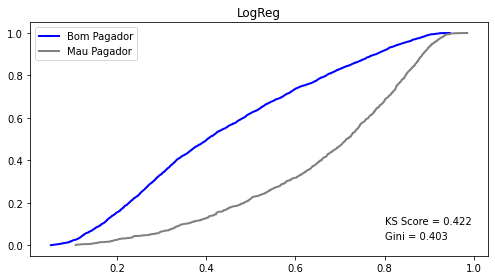

In [429]:
%matplotlib inline

# Visualize them
fig = plt.figure(figsize = (7, 4))
ax1 = plt.subplot(1, 1, 1)
#ax2 = plt.subplot(1, 3, 2)
#ax3 = plt.subplot(1, 3, 3)

ax1.set_title("LogReg")
sns.lineplot(x = cdf_log_reg['proba0'], y = cdf_log_reg['cdf0'], color = 'b', ax = ax1, linewidth = 2)
sns.lineplot(x = cdf_log_reg['proba1'], y = cdf_log_reg['cdf1'], color = 'gray', ax = ax1, linewidth = 2)
ax1.legend(["Bom Pagador", "Mau Pagador"])

ax1.annotate("KS Score = {} ".format(round(ks_score,3)) , xy=[0.8,0.1])
ax1.annotate("Gini = {} ".format(round(gini,3)) , xy=[0.8,0.03])


plt.tight_layout()
plt.show()

## 10.2 NearestCentroid

O codigo abaixo é responsável por selecionar:
    
    - Melhor fator de balanceamento
    - Melhor conjunto de hiperparâmetros
    - Melhor Quantidade de features
    - Melhor Conjunto de features
    - Melhor técnica de seleção de features: Seleção aleatória, Features Importance ou Combinacao entre features pré-selecionadas
    - Melhor tipo de pré-processamento: Aplicação ou não de StandardScaler e MinMaxScaler
    - Melhor tipo de pré-processamento: Aplicação ou não de PCA (iterado sobre k-1 features á 2 numero de reducoes)

### Definicoes de filtros para os experimentos

In [142]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from sklearn.svm import NuSVC
import random
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import roc_auc_score
from itertools import combinations

#############

from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier

import random
from sklearn.model_selection import PredefinedSplit
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from imblearn.under_sampling import NearMiss 

from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")




## Definição da função de refit no gridsearch:
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
roc_score = make_scorer(roc_auc_score)
ftwo_scorer = make_scorer(fbeta_score, beta=2)
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados, "roc": roc_score, 'f2': ftwo_scorer}
  
maximo_auc = 0

#Reset na lista dos resultados dos modelos iterados e no numero de experimentos rodados.
resultados_model = []
contagem_experimentos_unicos = 0



################################### Características Iteradoras ##############################


## ParamGrid do Modelo
param_grid1={"metric":['euclidean'], "shrink_threshold":[None]}

## Funcao de refit no gridsearch:
funcao_refit = 'roc'

# Fator de balanceamento de classes
fator_balanc = ['N/A',0.37,0.45,0.5,0.65,0.8,1]

## Definição do numero de vezes que cada conjunto será rodado com 80% dos dados de treino   e avaliados sobre dados de valid e teste
num_holdouts = 5

## Quantidade de features selecionadas
k_features = [i for i in range(2, X_train.shape[1]+1)]

## Metodo de selecao de features
metodo_selecao = ['Aleatorio','FeatureImportance','Combinacao']

##Quantidade de seeds geradas:
qtde_seeds = 1
seeds = [i for i in range(1,qtde_seeds+1)]



########################################### FILTROS DURANTE ITERAÇÕES ###################################

#fator_balanc = ['N/A',0.37,0.45,0.5,0.65,0.8,1]
#fator_balanc = [0.38,0.39,0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49]
fator_balanc = [0.42]

#k_features = [2,3,4,5,6,7,8,9,10,11,12]
k_features = [5,6,7]
k_features = [4,5,6,7]


#metodo_selecao = ['Aleatorio','FeatureImportance']
metodo_selecao = ['Combinacao']


## Lista de features pré-selecionadas para iterar as combinacoes
pre_selected = ['renda','score_h1','score_h2','score_h3','score_h4','score_h5','vr_exposicao_total_cartao']


#param_grid1={"metric":['euclidean','minkowski','manhattan','nan_euclidean','cosine','cityblock'], "shrink_threshold":[None,0,0.1,0.3,0.5,0.7,0.9,1]}
param_grid1 = {"metric":['manhattan'], "shrink_threshold":[None]}

### Experimentos

In [143]:
#Loop de seed aleatória
for seed in seeds:
    
    #print("Iterando seed = {}".format(seed))  


    ## Loop Balanceamento dos dados - APENAS DADOS DE TREINO
    for fator in fator_balanc:
        
        print("Iterando seed = {} - fator balanceamento = {}".format(seed,fator))

        if fator == "N/A": 
            X_train3 = X_train
            y_train3 = y_train
        else:
            nr = NearMiss(sampling_strategy=fator)
            X_train3, y_train3 = nr.fit_resample(X_train, y_train)


        #Renomeando test e valid para ficar com mesmo index q train
        X_test3 = X_test
        y_test3 = y_test

        X_valid3 = X_valid
        y_valid3 = y_valid


        ################ Definindo conjunto de treino + validacao para tunar o modelo avaliando nos dados de validação ################
        ## Concatenando dados de treino e valid:
        X_train_valid = pd.concat([X_train3, X_valid3], ignore_index = True )
        y_train_valid = pd.concat([y_train3, y_valid3], ignore_index = True )


        # The indices which have the value -1 will be kept in train.
        train_indices = np.full((X_train3.shape[0],), -1, dtype=int)

        # The indices which have zero or positive values, will be kept in valid
        valid_indices = np.full((X_valid3.shape[0],), 0, dtype=int)
        valid_fold = np.append(train_indices, valid_indices)

        # definindo o conjunto de validação
        ps = PredefinedSplit(valid_fold)
        
        ## Definição de modelos candidatos ################
        model1 = NearestCentroid()
        models = [model1]
        nome_modelo = ['NearestCentroid']

        ############################# Paramgrid de modelos ###############################
        list_param_grids = [param_grid1]
        dictionary_paramgrid = dict(zip(models, list_param_grids))


        #Loop modelos
        for num_modelo, model in enumerate(models):

            nome_modelo_testado = nome_modelo[num_modelo]

            param_grid = dictionary_paramgrid[model]

            ############################ GridSearch de modelos candidatos com todas features ###############################
            gs = GridSearchCV(model , param_grid=param_grid, scoring=scoring,  refit=funcao_refit, n_jobs=-1, cv = ps )

            #Fit dados 
            gs.fit(X_train_valid,y_train_valid)

            #melhores hyperparametros:
            hyperparametros = list(gs.best_params_.values())
            nome_hyperparametros = list(gs.best_params_.keys())


            #melhor modelo
            # CUIDADO: O atributo best_estimator_ retorna o melhor modelo ja treinado com o conjunto de dados
            # passado pelo metodo gs.fit(), ou seja ja vem treinado com X_train_valid,y_train_valid, sendo, portanto
            # necessário mais uma etapa de fit() do modelo tunado apenas com dados de treino.
            modelo_tunado = gs.best_estimator_

            # Refit no modelo tunado com apenas dados de treino para evitar superestimar os scores ao avaliar sobre dados de valid
            modelo_tunado.fit(X_train3,y_train3)



            #Loop Seletor de features:
            
            for k in k_features:
            
                #print("Iterando seed = {} - k-features = {}".format(seed,k))

                ##Itera sobre o método de selecao de feature:
                for seletor_feature in metodo_selecao:
                    
                    #############################  Seletor aleatório features  ############################
                    if seletor_feature == 'Aleatorio':

                        #Sorteando entre todas as features
                        selected = np.random.choice(X_train3.columns, k, replace=False)
                        selected = sorted(selected)
                        features_selecionadas = ','.join(list(selected))
                        
                        #1 unica combinacao
                        lista_combinacoes = [selected]

                    if seletor_feature == 'FeatureImportance':
                        
                        ## modelo seletor de feature (Random Forest -> Features Importance)
                        modelo_seletor = RandomForestClassifier(random_state=seed, n_jobs=-1)
                        modelo_seletor.fit(X_train3, y_train3)
                        
                        selector = SelectFromModel(modelo_seletor, max_features=k, threshold=-np.inf)
                        selector.fit(X_train3,y_train3)
                        mask = selector.get_support()
                        
                        selected = list(X_train3.columns[mask])
                        selected = sorted(selected)
                        features_selecionadas = ','.join(list(selected))
                        
                        #1 unica combinacao
                        lista_combinacoes = [selected]

                        
                    if seletor_feature == 'Combinacao':
                                
                        comb = combinations(pre_selected, k)
                        
                        # muitas combinacoes
                        lista_combinacoes = list(comb)
                        
                        

                    ## Iterando sobre todas possibilidades dentro das features pré-selecionadas
                    for num_iteracao_feature, combinacao_unica_feature in enumerate(lista_combinacoes):

                        print("Iterando k-features = {} - combinação {} de {}".format(k,num_iteracao_feature+1,len(lista_combinacoes)))
                        selected = list(combinacao_unica_feature)

                        # Coloca features em ordem alfabetica
                        selected = sorted(selected)



                        #Loop Holdout selecionar aleatoriamente 80% dados de treino para alimentar o modelo e a pipe.
                        for qtde_holdout in range(1,num_holdouts+1):

                            seed_holdout = random.randint(0,9999)
                            X_train4, X_descarte, y_train4, y_descarte = train_test_split(X_train3, y_train3, test_size=0.2, random_state=seed_holdout, stratify=y_train3)


                            ##Renomeando as variáveis para ficar com mesmo índice do X_train
                            X_train4 = X_train3
                            y_train4 = y_train3

                            X_test4 = X_test3
                            y_test4 = y_test3

                            X_valid4 = X_valid3
                            y_valid4 = y_valid3


                            #Fit do modelo aos 80% dos dados de treino selecionados pelo holdout aleatório
                            modelo_tunado.fit(X_train4, y_train4)


                            ################ Definição de Pipelines com modelo tunado ################

                            ## Com seletor
                            pipe1 = Pipeline([('scaler', StandardScaler()), (nome_modelo_testado, modelo_tunado)])
                            pipe2 = Pipeline([('scaler', MinMaxScaler()), (nome_modelo_testado, modelo_tunado)])
                            pipe3 = Pipeline([(nome_modelo_testado, modelo_tunado)])

                            
                            ###Criando dicionario pipes [pipe,scaler,aplicacao_pca]
                            dict_pipes = {'1':[pipe1,'StandardScaler','N/A'],'2':[pipe2,'MinMaxScaler','N/A'], '3':[pipe3,'N/A','N/A']}
                            

                            ## Gerador automático de de pipes com seletor + PCA de k-1 á 2 numero de reducoes, onde k = num features
                            
                            numero_pipe = 3
                            for num_reducoes in range(k-1,1,-1):
                                
                                string_aplicacao_pca = "PCA = " + str(num_reducoes)
                                
                                numero_pipe = numero_pipe + 1
                                pipe_gerada = Pipeline([('scaler', StandardScaler()),('PCA', PCA(n_components=num_reducoes)), (nome_modelo_testado, modelo_tunado)])
                                dict_pipes[str(numero_pipe)] = [pipe_gerada,'StandardScaler', string_aplicacao_pca]
                            
                                numero_pipe = numero_pipe + 1
                                pipe_gerada = Pipeline([('scaler', MinMaxScaler()),('PCA', PCA(n_components=num_reducoes)), (nome_modelo_testado, modelo_tunado)])
                                dict_pipes[str(numero_pipe)] = [pipe_gerada,"MinMaxScaler", string_aplicacao_pca]
                                
                                numero_pipe = numero_pipe + 1
                                pipe_gerada = Pipeline([('PCA', PCA(n_components=num_reducoes)),(nome_modelo_testado, modelo_tunado)])
                                dict_pipes[str(numero_pipe)] = [pipe_gerada, "N/A", string_aplicacao_pca]
                                

                            #Loop das pipelines
                            for pipeline in dict_pipes.items():
                                
                                num_pipe = int(pipeline[0])
                                pipe = pipeline[1][0]
                                scaler = pipeline[1][1]
                                string_pca = pipeline[1][2]

                                ##################### Aplicando as features selecionadas 
                                
                                X_train5 = X_train4[selected]
                                y_train5 = y_train4

                                X_valid5 = X_valid4[selected]
                                y_valid5 = y_valid4

                                X_test5 = X_test4[selected]
                                y_test5 = y_test4


                                ############################ Fit Pipeline #################

                                pipe.fit(X_train5,y_train5)


                                ################ Calculando métricas da pipe DADOS NÃO VISTOS - TESTE ################
                                ################ DADOS DE TESTE

                                # Fazendo predição
                                p = pipe.predict(X_test5)

                                contagem_experimentos_unicos = contagem_experimentos_unicos + 1

                                #Calculando o recall
                                recall_0 = recall_score(y_test5, p, pos_label=0)
                                recall_1 = recall_score(y_test5, p, pos_label=1)

                                #Calculando Precision
                                precision_0 = precision_score(y_test5, p, pos_label = 0)
                                precision_1 = precision_score(y_test5, p, pos_label = 1)

                                #Calculando acurácia
                                accuracy = accuracy_score(y_test5, p)

                                #Calculando AUC
                                auc = roc_auc_score(y_test5, p)

                                ##Gini
                                gini = auc * 2 - 1


                                ################ Calculando métricas da pipe DADOS NÃO VISTOS, subamostragem dos dados de treino ################
                                ################ - DADOS DE VALIDACAO

                                # Fazendo predição
                                p = pipe.predict(X_valid5)

                                #Calculando o recall
                                recall_0_valid = recall_score(y_valid5, p, pos_label=0)
                                recall_1_valid = recall_score(y_valid5, p, pos_label=1)

                                #Calculando Precision
                                precision_0_valid = precision_score(y_valid5, p, pos_label = 0)
                                precision_1_valid = precision_score(y_valid5, p, pos_label = 1)

                                #Calculando acurácia
                                accuracy_valid = accuracy_score(y_valid5, p)

                                #Calculando AUC
                                auc_valid = roc_auc_score(y_valid5, p)

                                ##Gini
                                gini_valid = auc_valid * 2 - 1


                                ##Media AUC valid e AUC teste
                                auc_valid_teste = (auc + auc_valid) / 2



                               ################ Armazenando e imprimindo os resultados  ################

                                dictionary_hyperparams = dict(zip(nome_hyperparametros, hyperparametros))


                                col_names_modelo = ['contagem_exp', 'seed'] + nome_hyperparametros + ['modelo','fator_balanc','num_pipe', 'metodo selecao', 'k (qtde_features)', 'PCA', 'scaler', 'features', 'acuracia', 'recall_0','recall_1','prec_0','prec_1','auc_test','auc_valid', 'media_auc_valid_teste','gini']                             
                                resultados_model.append(np.array( [contagem_experimentos_unicos, seed] + hyperparametros +  [nome_modelo_testado,fator, num_pipe,seletor_feature, k, string_pca, scaler, features_selecionadas, accuracy, recall_0, recall_1, precision_0, precision_1, auc, auc_valid, auc_valid_teste, gini]))



                                if auc > maximo_auc:


                                        print("============================================================================================================================")
                                        print("MÍNIMO GLOBAL: NOVO MELHOR MODELO ENCONTRADO:  {} - AUC teste = {} - AUC Valid = {} -  fator balanc = {}".format(nome_modelo_testado, auc, auc_valid, fator))                   
                                        print("     Características pipeline: num_pipeline = {} - tipo_scaler = {} ".format(num_pipe, scaler, string_pca))
                                        print("     Características do modelo: hyperparâmetros_selecionados = {}".format(dictionary_hyperparams))
                                        print("     Características das features selecionadas: metodo_selecao_features = {} - num_features = {}  - PCA = {}".format(seletor_feature, k, string_pca))
                                        print("     Features Selecionadas = {}".format(features_selecionadas))
                                        print("     DADOS TESTE - Recall 0 = {} - Recall 1 = {} ".format(recall_0,recall_1))
                                        print("============================================================================================================================")


                                        maximo_auc = auc



Iterando seed = 1 - fator balanceamento = 0.42
Iterando k-features = 4 - combinação 1 de 35
MÍNIMO GLOBAL: NOVO MELHOR MODELO ENCONTRADO:  NearestCentroid - AUC teste = 0.7084419340058439 - AUC Valid = 0.7129647025668725 -  fator balanc = 0.42
     Características pipeline: num_pipeline = 1 - tipo_scaler = StandardScaler 
     Características do modelo: hyperparâmetros_selecionados = {'metric': 'manhattan', 'shrink_threshold': None}
     Características das features selecionadas: metodo_selecao_features = Combinacao - num_features = 4  - PCA = N/A
     Features Selecionadas = renda,score_h1,score_h2,score_h3,score_h4,score_h5,vr_exposicao_total_cartao
     DADOS TESTE - Recall 0 = 0.712430426716141 - Recall 1 = 0.7044534412955465 
Iterando k-features = 4 - combinação 2 de 35
Iterando k-features = 4 - combinação 3 de 35
Iterando k-features = 4 - combinação 4 de 35
Iterando k-features = 4 - combinação 5 de 35
Iterando k-features = 4 - combinação 6 de 35
MÍNIMO GLOBAL: NOVO MELHOR MODELO 

Iterando k-features = 5 - combinação 3 de 21
Iterando k-features = 5 - combinação 4 de 21
Iterando k-features = 5 - combinação 5 de 21
Iterando k-features = 5 - combinação 6 de 21
Iterando k-features = 5 - combinação 7 de 21
Iterando k-features = 5 - combinação 8 de 21
Iterando k-features = 5 - combinação 9 de 21
Iterando k-features = 5 - combinação 10 de 21
Iterando k-features = 5 - combinação 11 de 21
Iterando k-features = 5 - combinação 12 de 21
Iterando k-features = 5 - combinação 13 de 21
Iterando k-features = 5 - combinação 14 de 21
Iterando k-features = 5 - combinação 15 de 21
Iterando k-features = 5 - combinação 16 de 21
MÍNIMO GLOBAL: NOVO MELHOR MODELO ENCONTRADO:  NearestCentroid - AUC teste = 0.7123720264697708 - AUC Valid = 0.7128149879054038 -  fator balanc = 0.42
     Características pipeline: num_pipeline = 1 - tipo_scaler = StandardScaler 
     Características do modelo: hyperparâmetros_selecionados = {'metric': 'manhattan', 'shrink_threshold': None}
     Característic

### Etapa 1: Seleção melhor fator de balanceamento

In [128]:
####### Resultados Modelo 

## Configurando Numero de caracteres para visualização do dataframe
pd.set_option('display.precision',5)
pd.reset_option('^display.',silent=True)

# Transformando resultados em dataframe
df_fator_balanc = pd.DataFrame(np.array(resultados_model), columns=col_names_modelo)
df_fator_balanc['auc_test'] = df_fator_balanc['auc_test'].astype(float, errors = 'raise')

## Criando dicionário com os tipos de dados dos parâmetros e das métricas
import itertools

col_metricas = col_names_modelo[11:]
dict_metrics_types = dict.fromkeys(col_metricas , 'float')

col_params = col_names_modelo[:11]
dict_params_types = dict.fromkeys(col_params , 'str')

dict_data_types = itertools.chain(dict_params_types.items(),dict_metrics_types.items())
dict_data_types = dict(dict_data_types)
dict_data_types

group_by_list = col_names_modelo[2:11]
aggregate_dict = {'contagem_exp': 'nunique', 'acuracia':np.mean, 'recall_0':np.mean, 'recall_1':np.mean, 'prec_0':np.mean, 'prec_1':np.mean, 'auc_test':np.mean, 'auc_valid': np.mean, 'media_auc_valid_teste': np.mean, 'gini': ['mean','std'] }

## Agrupando por hiperparâmetros e ordenando pelas métricas
df_fator_balanc_agrupado = df_fator_balanc.astype(dict_data_types).groupby(group_by_list).agg(aggregate_dict)
df_fator_balanc_agrupado = df_fator_balanc_agrupado.sort_values(by=('gini','mean'), ascending=False)
df_fator_balanc_agrupado[0:50]

contagem_exp  \
                                                                                                                                                                      nunique   
metric    shrink_threshold modelo          fator_balanc num_pipe metodo selecao    k (qtde_features) PCA      features                                                          
euclidean None             NearestCentroid 0.42         2        Aleatorio         12                N/A      fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                                                 FeatureImportance 12                N/A      fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                                        8        FeatureImportance 12                PCA = 10 fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                                                 Aleatorio         12                PCA = 10 fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                                        5        FeatureImportance 12                PCA = 11 fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                                                 Aleatorio         12                PCA = 11 fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                                        14       FeatureImportance 12                PCA = 8  fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                                                 Aleatorio         12                PCA = 8  fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                                        17       FeatureImportance 12                PCA = 7  fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                                                 Aleatorio         12                PCA = 7  fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                           0.43         17       Aleatorio         12                PCA = 7  fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                                                 FeatureImportance 12                PCA = 7  fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                           0.42         20       FeatureImportance 12                PCA = 6  fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                                                 Aleatorio         12                PCA = 6  fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                                        11       Aleatorio         12                PCA = 9  fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                                                 FeatureImportance 12                PCA = 9  fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                           0.43         8        FeatureImportance 12                PCA = 10 fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                                        2        Aleatorio         12                N/A      fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                                        8        Aleatorio         12                PCA = 10 fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                                        5        FeatureImportance 12                PCA = 11 fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                                        2        FeatureImportance 12     

Iteração 1:
- Fator de balanceamento > 0.37 e < 0.5 favorecem o indice gini

Iteração 2:
- Fator de balanceamento = 0.42 favorecem o indice gini

### Etapa 2: Seleção de Hiperparâmetros, features, Scalers e PCA

In [144]:
####### Resultados Modelo 

## Configurando Numero de caracteres para visualização do dataframe
pd.set_option('display.precision',5)
pd.reset_option('^display.',silent=True)

# Transformando resultados em dataframe
df_features = pd.DataFrame(np.array(resultados_model), columns=col_names_modelo)
df_features['auc_test'] = df_features['auc_test'].astype(float, errors = 'raise')

## Criando dicionário com os tipos de dados dos parâmetros e das métricas
import itertools

col_metricas = col_names_modelo[12:]
dict_metrics_types = dict.fromkeys(col_metricas , 'float')

col_params = col_names_modelo[:12]
dict_params_types = dict.fromkeys(col_params , 'str')

dict_data_types = itertools.chain(dict_params_types.items(),dict_metrics_types.items())
dict_data_types = dict(dict_data_types)
dict_data_types

group_by_list = col_names_modelo[2:12]
aggregate_dict = {'contagem_exp': 'nunique', 'acuracia':np.mean, 'recall_0':np.mean, 'recall_1':np.mean, 'prec_0':np.mean, 'prec_1':np.mean, 'auc_test':['mean', 'std'], 'auc_valid': np.mean, 'media_auc_valid_teste': np.mean, 'gini': ['mean','std'] }

## Agrupando por hiperparâmetros e ordenando pelas métricas
df_features_agrupado = df_features.astype(dict_data_types).groupby(group_by_list).agg(aggregate_dict)
df_features_agrupado = df_features_agrupado.sort_values(by=('gini','mean'), ascending=False)
df_features_agrupado[0:50]

contagem_exp  \
                                                                                                                                                                                 nunique   
metric    shrink_threshold modelo          fator_balanc num_pipe metodo selecao k (qtde_features) PCA     scaler         features                                                          
manhattan None             NearestCentroid 0.42         4        Combinacao     7                 PCA = 6 StandardScaler renda,score_h1,score_h2,score_h3,score_h4,score...            5   
                                                        2        Combinacao     7                 N/A     MinMaxScaler   renda,score_h1,score_h2,score_h3,score_h4,score...            5   
                                                        7        Combinacao     7                 PCA = 5 StandardScaler renda,score_h1,score_h2,score_h3,score_h4,score...            5   
                                                        10       Combinacao     7                 PCA = 4 StandardScaler renda,score_h1,score_h2,score_h3,score_h4,score...            5   
                                                        1        Combinacao     7                 N/A     StandardScaler renda,score_h1,score_h2,score_h3,score_h4,score...            5   
                                                        13       Combinacao     7                 PCA = 3 StandardScaler renda,score_h1,score_h2,score_h3,score_h4,score...            5   
                                                        16       Combinacao     7                 PCA = 2 StandardScaler renda,score_h1,score_h2,score_h3,score_h4,score...            5   
                                                        4        Combinacao     6                 PCA = 5 StandardScaler renda,score_h1,score_h2,score_h3,score_h4,score...           35   
                                                        1        Combinacao     6                 N/A     StandardScaler renda,score_h1,score_h2,score_h3,score_h4,score...           35   
                                                        7        Combinacao     6                 PCA = 4 StandardScaler renda,score_h1,score_h2,score_h3,score_h4,score...           35   
                                                        5        Combinacao     7                 PCA = 6 MinMaxScaler   renda,score_h1,score_h2,score_h3,score_h4,score...            5   
                                                        2        Combinacao     6                 N/A     MinMaxScaler   renda,score_h1,score_h2,score_h3,score_h4,score...           35   
                                                        10       Combinacao     6                 PCA = 3 StandardScaler renda,score_h1,score_h2,score_h3,score_h4,score...           35   
                                                        8        Combinacao     7                 PCA = 5 MinMaxScaler   renda,score_h1,score_h2,score_h3,score_h4,score...            5   
                                                        13       Combinacao     6                 PCA = 2 StandardScaler renda,score_h1,score_h2,score_h3,score_h4,score...           35   
                                                        11       Combinacao     7                 PCA = 4 MinMaxScaler   renda,score_h1,score_h2,score_h3,score_h4,score...            5   
                                                        14       Combinacao     7                 PCA = 3 MinMaxScaler   renda,score_h1,score_h2,score_h3,score_h4,score...            5   
                                                        17       Combinacao     7                 PCA = 2 MinMaxScaler   renda,score_h1,score_h2,score_h3,score_h4,score...            5   
                                                        11       Combinacao     6                 PCA = 3 MinMaxScaler   renda,score_h1,score_h2,score_h3,score_h4,score...           35   
                                    

**Iteracao 1:**
   - Metric = manhattan favorece o índice Gini
   - shrink_threshold = None favorece o índice Gini
   - Numero de features entre 5 e 7 favorece o índice Gini
   
**Iteracao 2:**
   - Conjunto distinto de features = renda,score_h1,score_h2,score_h3,score_h4,score_h5,vr_exposicao_total_cartao favorece o índice Gini.
   
Será iterado sobra todas as possibilidades do conjunto de 4 á 7 features selecionadas a partir das 7 pré-selecionadas. Total de possibilidades =  35 (para k=4) + 21 (para k=5) + 7 (para k=6) + 1 (para k=7)  = 64 possibilidades

**Iteracao 3:**
   - Conjunto de feature = renda,score_h1,score_h2,score_h3,score_h4,score_h5,vr_exposicao_total_cartao
   - Scaler = StandardScaler
   - PCA = 6

### Etapa 3: Consolidação e métricas do modelo

In [235]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

################ Pipeline e Modelo

Pipe_selecionada = Pipeline(steps=[('scaler', StandardScaler()), ('PCA', PCA(n_components=6)),
                ('NearestCentroid', NearestCentroid(metric='manhattan'))])

model = Pipe_selecionada

############### Pré-process antes de fitar o modelo

## underSampling -- apenas no TREINO
nr = NearMiss(sampling_strategy=0.42)
X_train_balanc, y_train_balanc = nr.fit_resample(X_train, y_train)

#Seletor de feature
selected = ['renda','score_h1','score_h2','score_h3','score_h4','score_h5','vr_exposicao_total_cartao']

## Selecionando as features
X_train2 = X_train_balanc[selected]
y_train2 = y_train_balanc

X_valid2 = X_valid[selected]
y_valid2 = y_valid

X_test2 = X_test[selected]
y_test2 = y_test

##Holdout
#X_train2, X_descarte, y_train2, y_descarte = train_test_split(X_train2, y_train2, test_size=0.2, random_state=1, stratify=y_train2)

    
############### fit treino
model.fit(X_train2,y_train2)

#predict teste
p = model.predict(X_test2)


############### Métricas ##################
#Relatórios e matriz de confusao
print("Classification Report - Test:\n",classification_report(y_test2, p))
print("")
print("Confusion Matrix Dados - Test:\n",confusion_matrix(y_test2, p))
print("")


#Calculando o recall
recall_0 = recall_score(y_test2, p, pos_label=0)
recall_1 = recall_score(y_test2, p, pos_label=1)

#Calculando Precision
precision_0 = precision_score(y_test2, p, pos_label = 0)
precision_1 = precision_score(y_test2, p, pos_label = 1)

#Calculando acurácia
accuracy = accuracy_score(y_test2, p)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test2, p)

#Calculando AUC
auc = roc_auc_score(y_test2, p)

##Gini
gini = auc * 2 - 1

##KS score
#ks_score = evaluate_ks(model, X_test_pca, y_test2)


print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Precision_0: %s" % (precision_0))
print("Precision_1: %s" % (precision_1))
print("Acuracia: %s" % (accuracy))
print("AUC: %s" % (auc))
print("Gini: %s" % (gini))
#print("KS Score: %s" % (ks_score))

## Definicao do modelo para avaliacao estatistica
nearest_centroid = model
selected_nearest_centroid = ['renda','score_h1','score_h2','score_h3','score_h4','score_h5','vr_exposicao_total_cartao']
fator_balanceamento_nearest_centroid = 0.42
scaler_nearest_centroid = "StandardScaler"
pca_nearest_centroid = 6

Classification Report - Test:
               precision    recall  f1-score   support

           0       0.87      0.72      0.79      2695
           1       0.48      0.71      0.57       988

    accuracy                           0.72      3683
   macro avg       0.67      0.71      0.68      3683
weighted avg       0.77      0.72      0.73      3683


Confusion Matrix Dados - Test:
 [[1937  758]
 [ 289  699]]

Recall_0: 0.7187384044526902
Recall_1: 0.7074898785425101
Precision_0: 0.8701707097933513
Precision_1: 0.47975291695264244
Acuracia: 0.7157208797176215
AUC: 0.7131141414976
Gini: 0.4262282829952


## 10.3 LightLGBM

O codigo abaixo é responsável por selecionar:
    
    - Melhor fator de balanceamento
    - Melhor conjunto de hiperparâmetros
    - Melhor Quantidade de features
    - Melhor Conjunto de features
    - Melhor técnica de seleção de features: Seleção aleatória, Features Importance ou Combinacao entre features pré-selecionadas
    - Melhor tipo de pré-processamento: Aplicação ou não de StandardScaler e MinMaxScaler
    - Melhor tipo de pré-processamento: Aplicação ou não de PCA (iterado sobre k-1 features á 2 numero de reducoes)

### Definicoes de filtros para os experimentos

In [213]:
from lightgbm import LGBMClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from sklearn.svm import NuSVC
import random
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import roc_auc_score
from itertools import combinations

#############

from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier

import random
from sklearn.model_selection import PredefinedSplit
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from imblearn.under_sampling import NearMiss 

from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")




## Definição da função de refit no gridsearch:
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
roc_score = make_scorer(roc_auc_score)
ftwo_scorer = make_scorer(fbeta_score, beta=2)
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados, "roc": roc_score, 'f2': ftwo_scorer}
  
maximo_auc = 0

#Reset na lista dos resultados dos modelos iterados e no numero de experimentos rodados.
resultados_model = []
contagem_experimentos_unicos = 0



################################### Características Iteradoras ##############################



## Funcao de refit no gridsearch:
funcao_refit = 'roc'

# Fator de balanceamento de classes
fator_balanc = ['N/A',0.37,0.45,0.5,0.65,0.8,1]

## Definição do numero de vezes que cada conjunto será rodado com 80% dos dados de treino   e avaliados sobre dados de valid e teste
num_holdouts = 5

## Quantidade de features selecionadas
k_features = [i for i in range(2, X_train.shape[1]+1)]

## Metodo de selecao de features
metodo_selecao = ['Aleatorio','FeatureImportance','Combinacao']

##Quantidade de seeds geradas:
qtde_seeds = 1
seeds = [i for i in range(1,qtde_seeds+1)]

##Classweights
weights = np.linspace(0.1,0.9,15)
list_class_weights = []
for i in weights:
    class_weight = {0: i, 1:1.0-i}
    list_class_weights.append(class_weight)
list_class_weights

## ParamGrid do Modelo
param_grid1={"num_leaves":[31], 'class_weight': list_class_weights}

########################################### FILTROS DURANTE ITERAÇÕES ###################################

#fator_balanc = ['N/A',0.37,0.45,0.5,0.65,0.8,1]
#fator_balanc = ['N/A',0.37,0.38,0.39,0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.5,0.65,0.8,1]
fator_balanc = ['N/A']

#k_features = [12]
#k_features = [4,5,6,7,8,9,10,11,12]
#k_features = [9,10,11,12]
k_features = [10,11]

list_class_weights = [{0: 0.21, 1: 0.79}]

#metodo_selecao = ['Aleatorio','FeatureImportance']
metodo_selecao = ['Combinacao']


## Lista de features pré-selecionadas para iterar as combinacoes
pre_selected = X_train.columns.tolist()

#param_grid1={"max_depth":[-1,10,20,35,50], "learning_rate":[0.1,0.01,0.001], "n_estimators":[100,50,200], "num_leaves":[31,5,10,50], 'class_weight': list_class_weights}
#param_grid1={"max_depth":[-1,100,150,250], "learning_rate":[0.1], "n_estimators":[20,30,40,50,60,70,80,90], "num_leaves":[10,15,20,25,30], 'class_weight': list_class_weights}
param_grid1={"max_depth":[-1], "learning_rate":[0.1], "n_estimators":[60,62,64,66,68,70,72,74,76,78,80], "num_leaves":[6,7,8,9,10,11,12,13,14,15], 'class_weight': list_class_weights}
param_grid1={"max_depth":[-1], "learning_rate":[0.1], "n_estimators":[74], "num_leaves":[10], 'class_weight': list_class_weights}

### Experimentos

In [214]:
#Loop de seed aleatória
for seed in seeds:
    
    #print("Iterando seed = {}".format(seed))  


    ## Loop Balanceamento dos dados - APENAS DADOS DE TREINO
    for fator in fator_balanc:
        
        print("Iterando seed = {} - fator balanceamento = {}".format(seed,fator))

        if fator == "N/A": 
            X_train3 = X_train
            y_train3 = y_train
        else:
            nr = NearMiss(sampling_strategy=fator)
            X_train3, y_train3 = nr.fit_resample(X_train, y_train)


        #Renomeando test e valid para ficar com mesmo index q train
        X_test3 = X_test
        y_test3 = y_test

        X_valid3 = X_valid
        y_valid3 = y_valid


        ################ Definindo conjunto de treino + validacao para tunar o modelo avaliando nos dados de validação ################
        ## Concatenando dados de treino e valid:
        X_train_valid = pd.concat([X_train3, X_valid3], ignore_index = True )
        y_train_valid = pd.concat([y_train3, y_valid3], ignore_index = True )


        # The indices which have the value -1 will be kept in train.
        train_indices = np.full((X_train3.shape[0],), -1, dtype=int)

        # The indices which have zero or positive values, will be kept in valid
        valid_indices = np.full((X_valid3.shape[0],), 0, dtype=int)
        valid_fold = np.append(train_indices, valid_indices)

        # definindo o conjunto de validação
        ps = PredefinedSplit(valid_fold)
        
        ## Definição de modelos candidatos ################
        model1 = LGBMClassifier(random_state=seed, n_jobs=-1)
        models = [model1]
        nome_modelo = ['LGBM']

        ############################# Paramgrid de modelos ###############################
        list_param_grids = [param_grid1]
        dictionary_paramgrid = dict(zip(models, list_param_grids))


        #Loop modelos
        for num_modelo, model in enumerate(models):

            nome_modelo_testado = nome_modelo[num_modelo]

            param_grid = dictionary_paramgrid[model]

            ############################ GridSearch de modelos candidatos com todas features ###############################
            gs = GridSearchCV(model , param_grid=param_grid, scoring=scoring,  refit=funcao_refit, n_jobs=-1, cv = ps )

            #Fit dados 
            gs.fit(X_train_valid,y_train_valid)

            #melhores hyperparametros:
            hyperparametros = list(gs.best_params_.values())
            nome_hyperparametros = list(gs.best_params_.keys())


            #melhor modelo
            # CUIDADO: O atributo best_estimator_ retorna o melhor modelo ja treinado com o conjunto de dados
            # passado pelo metodo gs.fit(), ou seja ja vem treinado com X_train_valid,y_train_valid, sendo, portanto
            # necessário mais uma etapa de fit() do modelo tunado apenas com dados de treino.
            modelo_tunado = gs.best_estimator_

            # Refit no modelo tunado com apenas dados de treino para evitar superestimar os scores ao avaliar sobre dados de valid
            modelo_tunado.fit(X_train3,y_train3)



            #Loop Seletor de features:
            
            for k in k_features:
            
                #print("Iterando seed = {} - k-features = {}".format(seed,k))

                ##Itera sobre o método de selecao de feature:
                for seletor_feature in metodo_selecao:
                    
                    #############################  Seletor aleatório features  ############################
                    if seletor_feature == 'Aleatorio':

                        #Sorteando entre todas as features
                        selected = np.random.choice(X_train3.columns, k, replace=False)
                        selected = sorted(selected)
                        features_selecionadas = ','.join(list(selected))
                        
                        #1 unica combinacao
                        lista_combinacoes = [selected]

                    if seletor_feature == 'FeatureImportance':
                        
                        ## modelo seletor de feature (Random Forest -> Features Importance)
                        modelo_seletor = RandomForestClassifier(random_state=seed, n_jobs=-1)
                        modelo_seletor.fit(X_train3, y_train3)
                        
                        selector = SelectFromModel(modelo_seletor, max_features=k, threshold=-np.inf)
                        selector.fit(X_train3,y_train3)
                        mask = selector.get_support()
                        
                        selected = list(X_train3.columns[mask])
                        selected = sorted(selected)
                        features_selecionadas = ','.join(list(selected))
                        
                        #1 unica combinacao
                        lista_combinacoes = [selected]

                        
                    if seletor_feature == 'Combinacao':
                                
                        comb = combinations(pre_selected, k)
                        
                        # muitas combinacoes
                        lista_combinacoes = list(comb)
                        
                        

                    ## Iterando sobre todas possibilidades dentro das features pré-selecionadas
                    for num_iteracao_feature, combinacao_unica_feature in enumerate(lista_combinacoes):

                        print("Iterando k-features = {} - combinação {} de {}".format(k,num_iteracao_feature+1,len(lista_combinacoes)))
                        selected = list(combinacao_unica_feature)

                        # Coloca features em ordem alfabetica
                        selected = sorted(selected)



                        #Loop Holdout selecionar aleatoriamente 80% dados de treino para alimentar o modelo e a pipe.
                        for qtde_holdout in range(1,num_holdouts+1):

                            seed_holdout = random.randint(0,9999)
                            X_train4, X_descarte, y_train4, y_descarte = train_test_split(X_train3, y_train3, test_size=0.2, random_state=seed_holdout, stratify=y_train3)


                            ##Renomeando as variáveis para ficar com mesmo índice do X_train
                            X_train4 = X_train3
                            y_train4 = y_train3

                            X_test4 = X_test3
                            y_test4 = y_test3

                            X_valid4 = X_valid3
                            y_valid4 = y_valid3


                            #Fit do modelo aos 80% dos dados de treino selecionados pelo holdout aleatório
                            modelo_tunado.fit(X_train4, y_train4)


                            ################ Definição de Pipelines com modelo tunado ################

                            ## Com seletor
                            pipe1 = Pipeline([('scaler', StandardScaler()), (nome_modelo_testado, modelo_tunado)])
                            pipe2 = Pipeline([('scaler', MinMaxScaler()), (nome_modelo_testado, modelo_tunado)])
                            pipe3 = Pipeline([(nome_modelo_testado, modelo_tunado)])

                            
                            ###Criando dicionario pipes [pipe,scaler,aplicacao_pca]
                            dict_pipes = {'1':[pipe1,'StandardScaler','N/A'],'2':[pipe2,'MinMaxScaler','N/A'], '3':[pipe3,'N/A','N/A']}
                            

                            ## Gerador automático de de pipes com seletor + PCA de k-1 á 2 numero de reducoes, onde k = num features
                            
                            numero_pipe = 3
                            for num_reducoes in range(k-1,1,-1):
                                
                                string_aplicacao_pca = "PCA = " + str(num_reducoes)
                                
                                numero_pipe = numero_pipe + 1
                                pipe_gerada = Pipeline([('scaler', StandardScaler()),('PCA', PCA(n_components=num_reducoes)), (nome_modelo_testado, modelo_tunado)])
                                dict_pipes[str(numero_pipe)] = [pipe_gerada,'StandardScaler', string_aplicacao_pca]
                            
                                numero_pipe = numero_pipe + 1
                                pipe_gerada = Pipeline([('scaler', MinMaxScaler()),('PCA', PCA(n_components=num_reducoes)), (nome_modelo_testado, modelo_tunado)])
                                dict_pipes[str(numero_pipe)] = [pipe_gerada,"MinMaxScaler", string_aplicacao_pca]
                                
                                numero_pipe = numero_pipe + 1
                                pipe_gerada = Pipeline([('PCA', PCA(n_components=num_reducoes)),(nome_modelo_testado, modelo_tunado)])
                                dict_pipes[str(numero_pipe)] = [pipe_gerada, "N/A", string_aplicacao_pca]
                                

                            #Loop das pipelines
                            for pipeline in dict_pipes.items():
                                
                                num_pipe = int(pipeline[0])
                                pipe = pipeline[1][0]
                                scaler = pipeline[1][1]
                                string_pca = pipeline[1][2]

                                ##################### Aplicando as features selecionadas 
                                
                                X_train5 = X_train4[selected]
                                y_train5 = y_train4

                                X_valid5 = X_valid4[selected]
                                y_valid5 = y_valid4

                                X_test5 = X_test4[selected]
                                y_test5 = y_test4


                                ############################ Fit Pipeline #################

                                pipe.fit(X_train5,y_train5)


                                ################ Calculando métricas da pipe DADOS NÃO VISTOS - TESTE ################
                                ################ DADOS DE TESTE

                                # Fazendo predição
                                p = pipe.predict(X_test5)

                                contagem_experimentos_unicos = contagem_experimentos_unicos + 1

                                #Calculando o recall
                                recall_0 = recall_score(y_test5, p, pos_label=0)
                                recall_1 = recall_score(y_test5, p, pos_label=1)

                                #Calculando Precision
                                precision_0 = precision_score(y_test5, p, pos_label = 0)
                                precision_1 = precision_score(y_test5, p, pos_label = 1)

                                #Calculando acurácia
                                accuracy = accuracy_score(y_test5, p)

                                #Calculando AUC
                                auc = roc_auc_score(y_test5, p)

                                ##Gini
                                gini = auc * 2 - 1


                                ################ Calculando métricas da pipe DADOS NÃO VISTOS, subamostragem dos dados de treino ################
                                ################ - DADOS DE VALIDACAO

                                # Fazendo predição
                                p = pipe.predict(X_valid5)

                                #Calculando o recall
                                recall_0_valid = recall_score(y_valid5, p, pos_label=0)
                                recall_1_valid = recall_score(y_valid5, p, pos_label=1)

                                #Calculando Precision
                                precision_0_valid = precision_score(y_valid5, p, pos_label = 0)
                                precision_1_valid = precision_score(y_valid5, p, pos_label = 1)

                                #Calculando acurácia
                                accuracy_valid = accuracy_score(y_valid5, p)

                                #Calculando AUC
                                auc_valid = roc_auc_score(y_valid5, p)

                                ##Gini
                                gini_valid = auc_valid * 2 - 1


                                ##Media AUC valid e AUC teste
                                auc_valid_teste = (auc + auc_valid) / 2



                               ################ Armazenando e imprimindo os resultados  ################

                                dictionary_hyperparams = dict(zip(nome_hyperparametros, hyperparametros))


                                col_names_modelo = ['contagem_exp', 'seed'] + nome_hyperparametros + ['modelo','fator_balanc','num_pipe', 'metodo selecao', 'k (qtde_features)', 'PCA', 'scaler', 'features', 'acuracia', 'recall_0','recall_1','prec_0','prec_1','auc_test','auc_valid', 'media_auc_valid_teste','gini']                             
                                resultados_model.append(np.array( [contagem_experimentos_unicos, seed] + hyperparametros +  [nome_modelo_testado,fator, num_pipe,seletor_feature, k, string_pca, scaler, features_selecionadas, accuracy, recall_0, recall_1, precision_0, precision_1, auc, auc_valid, auc_valid_teste, gini]))



                                if auc > maximo_auc:


                                        print("============================================================================================================================")
                                        print("MÍNIMO GLOBAL: NOVO MELHOR MODELO ENCONTRADO:  {} - AUC teste = {} - AUC Valid = {} -  fator balanc = {}".format(nome_modelo_testado, auc, auc_valid, fator))                   
                                        print("     Características pipeline: num_pipeline = {} - tipo_scaler = {} ".format(num_pipe, scaler, string_pca))
                                        print("     Características do modelo: hyperparâmetros_selecionados = {}".format(dictionary_hyperparams))
                                        print("     Características das features selecionadas: metodo_selecao_features = {} - num_features = {}  - PCA = {}".format(seletor_feature, k, string_pca))
                                        print("     Features Selecionadas = {}".format(features_selecionadas))
                                        print("     DADOS TESTE - Recall 0 = {} - Recall 1 = {} ".format(recall_0,recall_1))
                                        print("============================================================================================================================")


                                        maximo_auc = auc



Iterando seed = 1 - fator balanceamento = N/A
Iterando k-features = 10 - combinação 1 de 66
MÍNIMO GLOBAL: NOVO MELHOR MODELO ENCONTRADO:  LGBM - AUC teste = 0.7029340959792088 - AUC Valid = 0.7133310631502312 -  fator balanc = N/A
     Características pipeline: num_pipeline = 1 - tipo_scaler = StandardScaler 
     Características do modelo: hyperparâmetros_selecionados = {'class_weight': {0: 0.21, 1: 0.79}, 'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 74, 'num_leaves': 10}
     Características das features selecionadas: metodo_selecao_features = Combinacao - num_features = 10  - PCA = N/A
     Features Selecionadas = fl_consig,fl_veiculos,flagcontaativabd,idade_serasa,limite_cartao,renda,score_h1,score_h2,score_h3,score_h4,score_h5,vr_exposicao_total_cartao
     DADOS TESTE - Recall 0 = 0.6133580705009276 - Recall 1 = 0.7925101214574899 
MÍNIMO GLOBAL: NOVO MELHOR MODELO ENCONTRADO:  LGBM - AUC teste = 0.7035411956464588 - AUC Valid = 0.7109056856344379 -  fator balanc = N/A

Iterando k-features = 10 - combinação 24 de 66
Iterando k-features = 10 - combinação 25 de 66
Iterando k-features = 10 - combinação 26 de 66
Iterando k-features = 10 - combinação 27 de 66
Iterando k-features = 10 - combinação 28 de 66
Iterando k-features = 10 - combinação 29 de 66
Iterando k-features = 10 - combinação 30 de 66
Iterando k-features = 10 - combinação 31 de 66
Iterando k-features = 10 - combinação 32 de 66
Iterando k-features = 10 - combinação 33 de 66
Iterando k-features = 10 - combinação 34 de 66
Iterando k-features = 10 - combinação 35 de 66
Iterando k-features = 10 - combinação 36 de 66
Iterando k-features = 10 - combinação 37 de 66
Iterando k-features = 10 - combinação 38 de 66
Iterando k-features = 10 - combinação 39 de 66
Iterando k-features = 10 - combinação 40 de 66
Iterando k-features = 10 - combinação 41 de 66
Iterando k-features = 10 - combinação 42 de 66
Iterando k-features = 10 - combinação 43 de 66
Iterando k-features = 10 - combinação 44 de 66
Iterando k-fe

### Etapa 1: Seleção melhor fator de balanceamento

In [178]:
####### Resultados Modelo 

## Configurando Numero de caracteres para visualização do dataframe
pd.set_option('display.precision',5)
pd.reset_option('^display.',silent=True)

# Transformando resultados em dataframe
df_fator_balanc = pd.DataFrame(np.array(resultados_model), columns=col_names_modelo)
df_fator_balanc['auc_test'] = df_fator_balanc['auc_test'].astype(float, errors = 'raise')

## Criando dicionário com os tipos de dados dos parâmetros e das métricas
import itertools

col_metricas = col_names_modelo[12:]
dict_metrics_types = dict.fromkeys(col_metricas , 'float')

col_params = col_names_modelo[:12]
dict_params_types = dict.fromkeys(col_params , 'str')

dict_data_types = itertools.chain(dict_params_types.items(),dict_metrics_types.items())
dict_data_types = dict(dict_data_types)
dict_data_types

group_by_list = col_names_modelo[2:12]
aggregate_dict = {'contagem_exp': 'nunique', 'acuracia':np.mean, 'recall_0':np.mean, 'recall_1':np.mean, 'prec_0':np.mean, 'prec_1':np.mean, 'auc_test':np.mean, 'auc_valid': np.mean, 'media_auc_valid_teste': np.mean, 'gini': ['mean','std'] }

## Agrupando por hiperparâmetros e ordenando pelas métricas
df_fator_balanc_agrupado = df_fator_balanc.astype(dict_data_types).groupby(group_by_list).agg(aggregate_dict)
df_fator_balanc_agrupado = df_fator_balanc_agrupado.sort_values(by=('gini','mean'), ascending=False)
df_fator_balanc_agrupado[0:50]

contagem_exp  \
                                                                                                                                                                                                           nunique   
class_weight                                   num_leaves modelo fator_balanc num_pipe metodo selecao    k (qtde_features) PCA      scaler         features                                                          
{0: 0.2142857142857143, 1: 0.7857142857142857} 31         LGBM   N/A          5        FeatureImportance 12                PCA = 11 MinMaxScaler   fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                                                                       Aleatorio         12                PCA = 11 MinMaxScaler   fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                                                              22       FeatureImportance 12                PCA = 5  StandardScaler fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                                                                       Aleatorio         12                PCA = 5  StandardScaler fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                                                              10       Aleatorio         12                PCA = 9  StandardScaler fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                                                                       FeatureImportance 12                PCA = 9  StandardScaler fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                                                 0.37         3        FeatureImportance 12                N/A      N/A            fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                                                                       Aleatorio         12                N/A      N/A            fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                                                 0.38         5        Aleatorio         12                PCA = 11 MinMaxScaler   fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                                                                       FeatureImportance 12                PCA = 11 MinMaxScaler   fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                                                 0.37         1        Aleatorio         12                N/A      StandardScaler fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                                                                       FeatureImportance 12                N/A      StandardScaler fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                                                              16       FeatureImportance 12                PCA = 7  StandardScaler fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                                                                       Aleatorio         12                PCA = 7  StandardScaler fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                                                 N/A          7        Aleatorio         12                PCA = 10 StandardScaler fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                                                                       FeatureImportance 12                PCA = 10 StandardScaler fl_consig,fl_veiculos,flagcontaativabd,idade_se...            5   
                                                                 0.37         7        FeatureImportance 12                PCA = 10 

**Iteracao 1:**
    - Fator de balanceamento entre 0.37 e 0.5 performaram melhor
    
 **Iteracao 2:**
    - Fator de balanceamento = N/A performou melhor

### Etapa 2: Seleção de Hiperparâmetros, features, Scalers e PCA

In [215]:
####### Resultados Modelo 

## Configurando Numero de caracteres para visualização do dataframe
pd.set_option('display.precision',5)
pd.reset_option('^display.',silent=True)

# Transformando resultados em dataframe
df_features = pd.DataFrame(np.array(resultados_model), columns=col_names_modelo)
df_features['auc_test'] = df_features['auc_test'].astype(float, errors = 'raise')

## Criando dicionário com os tipos de dados dos parâmetros e das métricas
import itertools


index_primeiro_valor_numerico = col_names_modelo.index('acuracia')
col_metricas = col_names_modelo[index_primeiro_valor_numerico:]
dict_metrics_types = dict.fromkeys(col_metricas , 'float')

col_params = col_names_modelo[:index_primeiro_valor_numerico]
dict_params_types = dict.fromkeys(col_params , 'str')

dict_data_types = itertools.chain(dict_params_types.items(),dict_metrics_types.items())
dict_data_types = dict(dict_data_types)
dict_data_types

group_by_list = col_names_modelo[2:index_primeiro_valor_numerico]
aggregate_dict = {'contagem_exp': 'nunique', 'acuracia':np.mean, 'recall_0':np.mean, 'recall_1':np.mean, 'prec_0':np.mean, 'prec_1':np.mean, 'auc_test':['mean', 'std'], 'auc_valid': np.mean, 'media_auc_valid_teste': np.mean, 'gini': ['mean','std'] }

## Agrupando por hiperparâmetros e ordenando pelas métricas
df_features_agrupado = df_features.astype(dict_data_types).groupby(group_by_list).agg(aggregate_dict)
df_features_agrupado = df_features_agrupado.sort_values(by=('gini','mean'), ascending=False)
df_features_agrupado[0:50]

contagem_exp  \
                                                                                                                                                                                                                 nunique   
class_weight       learning_rate max_depth n_estimators num_leaves modelo fator_balanc num_pipe metodo selecao k (qtde_features) PCA      scaler         features                                                          
{0: 0.21, 1: 0.79} 0.1           -1        74           10         LGBM   N/A          1        Combinacao     11                N/A      StandardScaler fl_consig,fl_veiculos,flagcontaativabd,idade_se...           60   
                                                                                       2        Combinacao     11                N/A      MinMaxScaler   fl_consig,fl_veiculos,flagcontaativabd,idade_se...           60   
                                                                                       4        Combinacao     11                PCA = 10 StandardScaler fl_consig,fl_veiculos,flagcontaativabd,idade_se...           60   
                                                                                       5        Combinacao     11                PCA = 10 MinMaxScaler   fl_consig,fl_veiculos,flagcontaativabd,idade_se...           60   
                                                                                       10       Combinacao     11                PCA = 8  StandardScaler fl_consig,fl_veiculos,flagcontaativabd,idade_se...           60   
                                                                                       16       Combinacao     11                PCA = 6  StandardScaler fl_consig,fl_veiculos,flagcontaativabd,idade_se...           60   
                                                                                       8        Combinacao     11                PCA = 9  MinMaxScaler   fl_consig,fl_veiculos,flagcontaativabd,idade_se...           60   
                                                                                       13       Combinacao     11                PCA = 7  StandardScaler fl_consig,fl_veiculos,flagcontaativabd,idade_se...           60   
                                                                                       3        Combinacao     11                N/A      N/A            fl_consig,fl_veiculos,flagcontaativabd,idade_se...           60   
                                                                                       7        Combinacao     11                PCA = 9  StandardScaler fl_consig,fl_veiculos,flagcontaativabd,idade_se...           60   
                                                                                       2        Combinacao     10                N/A      MinMaxScaler   fl_consig,fl_veiculos,flagcontaativabd,idade_se...          330   
                                                                                       5        Combinacao     10                PCA = 9  MinMaxScaler   fl_consig,fl_veiculos,flagcontaativabd,idade_se...          330   
                                                                                       3        Combinacao     10                N/A      N/A            fl_consig,fl_veiculos,flagcontaativabd,idade_se...          330   
                                                                                       1        Combinacao     10                N/A      StandardScaler fl_consig,fl_veiculos,flagcontaativabd,idade_se...          330   
                                                                                       19       Combinacao     11                PCA = 5  StandardScaler fl_consig,fl_veiculos,flagcontaativabd,idade_se...           60   
                                                                                       9        Combinacao     11                PCA = 9  N/A            fl_consig,fl_veiculos,flagcontaativabd,idade_se...           60   
                        

**Resultados iteracao 1:**

- Class_Weights = {0:0.21,1:0.79} favorece melhores resultados no indice Gini
- Learning_rate = 0.1 favorece melhores resultados no indice Gini
- Max_depth = -1 (sem limites) favorece melhores resultados no indice Gini
- n_estimators próximo á 50 favorece melhores resultados no indice Gini
- num_leaves entre 1 á 31 favorece melhores resultados no indice Gini
- Numero de features entre 10 e 12 favorecem melhores resultados no indice Gini


**Resultados iteracao 2:**

- n_estimators entre 60 e 80 favorecem melhores resultados no indice Gini
- num_leaves entre 10 e 15 favorece melhores resultados no indice Gini
- Numero de features entre 10 e 11 favorece melhores resultados no indice Gini
- Conjunto de features = fl_consig,fl_veiculos,flagcontaativabd,idade_serasa,limite_cartao,renda,score_h1,score_h2,score_h3,score_h4,score_h5,vr_exposicao_total_cartao	favorece melhores resultados no indice Gini


Será iterado sobra todas as possibilidades do conjunto de 10 e 11 features selecionadas a partir das 12 do dataset. Total de possibilidades = 66 (k=10) + 12 (k=11) = 78 possibilidades.

**Resultados iteracao 3:**

- n_estimators = 74 favorece melhores resultados no indice Gini
- num_leaves = 11 favorece melhores resultados no indice Gini
- Features = fl_consig,fl_veiculos,flagcontaativabd,idade_serasa,limite_cartao,renda,score_h1,score_h2,score_h3,score_h4,score_h5,vr_exposicao_total_cartao	favorece melhores resultados no indice Gini favorece os melhores resultados no indice Gini




### Etapa 3: Consolidação e métricas do modelo

In [430]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

################ Pipeline e Modelo

Pipe_selecionada = Pipeline(steps=[('LGBM',
                 LGBMClassifier(class_weight={0: 0.21, 1: 0.79},
                                n_estimators=74, num_leaves=10,
                                random_state=1))])

model = Pipe_selecionada

############### Pré-process antes de fitar o modelo


#Seletor de feature
selected = ['fl_consig','fl_veiculos','flagcontaativabd','idade_serasa','limite_cartao','renda','score_h1','score_h2','score_h3','score_h4','score_h5','vr_exposicao_total_cartao']

## Selecionando as features
X_train2 = X_train[selected]
y_train2 = y_train

X_valid2 = X_valid[selected]
y_valid2 = y_valid

X_test2 = X_test[selected]
y_test2 = y_test

##Holdout
X_train2, X_descarte, y_train2, y_descarte = train_test_split(X_train2, y_train2, test_size=0.2, random_state=1, stratify=y_train2)

############### fit treino
model.fit(X_train2,y_train2)

#predict teste
p = model.predict(X_test2)
y_proba_lgbm = model.predict_proba(X_test2)


############### Métricas ##################
#Relatórios e matriz de confusao
print("Classification Report - Test:\n",classification_report(y_test2, p))
print("")
print("Confusion Matrix Dados - Test:\n",confusion_matrix(y_test2, p))
print("")


#Calculando o recall
recall_0 = recall_score(y_test2, p, pos_label=0)
recall_1 = recall_score(y_test2, p, pos_label=1)

#Calculando Precision
precision_0 = precision_score(y_test2, p, pos_label = 0)
precision_1 = precision_score(y_test2, p, pos_label = 1)

#Calculando acurácia
accuracy = accuracy_score(y_test2, p)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test2, p)

#Calculando AUC
auc = roc_auc_score(y_test2, p)

##Gini
gini = auc * 2 - 1

##KS score
ks_score = evaluate_ks(model, X_test2, y_test2)


print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Precision_0: %s" % (precision_0))
print("Precision_1: %s" % (precision_1))
print("Acuracia: %s" % (accuracy))
print("AUC: %s" % (auc))
print("Gini: %s" % (gini))
print("KS Score: %s" % (ks_score))


## Armazenando dados para realizar validacao estatistica
lgbm = model
selected_lgbm = ['fl_consig','fl_veiculos','flagcontaativabd','idade_serasa','limite_cartao','renda','score_h1','score_h2','score_h3','score_h4','score_h5','vr_exposicao_total_cartao']
fator_balanceamento_lgbm = 'N/A'
scaler_lgbm = "N/A"
pca_lgbm = "N/A"

Classification Report - Test:
               precision    recall  f1-score   support

           0       0.89      0.61      0.73      2695
           1       0.43      0.80      0.56       988

    accuracy                           0.66      3683
   macro avg       0.66      0.71      0.64      3683
weighted avg       0.77      0.66      0.68      3683


Confusion Matrix Dados - Test:
 [[1657 1038]
 [ 199  789]]

Recall_0: 0.6148423005565863
Recall_1: 0.798582995951417
Precision_0: 0.8927801724137931
Precision_1: 0.4318555008210181
Acuracia: 0.6641325006787945
AUC: 0.7067126482540016
Gini: 0.4134252965080032
KS Score: 0.4251462822891394


### Etapa 4: Plot KS Score

In [431]:
cdf_log_lgbm = get_classes_cdf(y_test2, y_proba_lgbm)

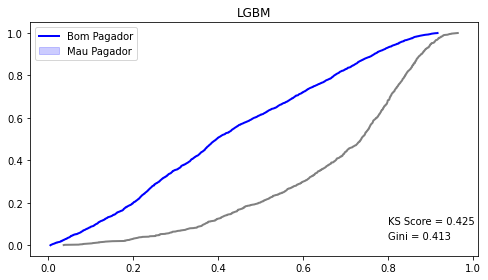

In [434]:
%matplotlib inline

# Visualize them
fig = plt.figure(figsize = (7, 4))
ax1 = plt.subplot(1, 1, 1)
#ax2 = plt.subplot(1, 3, 2)
#ax3 = plt.subplot(1, 3, 3)

ax1.set_title("LGBM")
sns.lineplot(x = cdf_log_lgbm['proba0'], y = cdf_log_lgbm['cdf0'], color = 'b', ax = ax1, linewidth = 2)
sns.lineplot(x = cdf_log_lgbm['proba1'], y = cdf_log_lgbm['cdf1'], color = 'gray', ax = ax1, linewidth = 2)
ax1.legend(["Bom Pagador", "Mau Pagador"])

ax1.annotate("KS Score = {} ".format(round(ks_score,3)) , xy=[0.8,0.1])
ax1.annotate("Gini = {} ".format(round(gini,3)) , xy=[0.8,0.03])


plt.tight_layout()
plt.show()

# 11 VALIDACAO ESTATISTICA

## 11.1 Validacao Cruzada

In [238]:
dict_propriedades_modelos = {'NearestCentroid': [nearest_centroid, selected_nearest_centroid,fator_balanceamento_nearest_centroid, scaler_nearest_centroid,pca_nearest_centroid], 
                            'LGBM': [lgbm, selected_lgbm,fator_balanceamento_lgbm, scaler_lgbm,pca_lgbm],
                            'Regressao Logistica': [log_reg, selected_log_reg,fator_balanceamento_log_reg, scaler_log_reg,pca_log_reg]}

In [250]:
for models_prop in dict_propriedades_modelos.items():
    print(models_prop[0])

NearestCentroid
LGBM
Regressao Logistica


In [313]:
resultados_logreg = []
resultados_nearestcentroid = []
resultados_lgbm = []

for i in range(60):
    print("Repetição %s" % (i+1))
    
    ### Loop modelos
    for models_prop in dict_propriedades_modelos.items():
        
        
        nome_modelo = models_prop[0]
        model = models_prop[1][0]
        features = models_prop[1][1]
        fator_balanc = models_prop[1][2]
        scaler = models_prop[1][3]
        num_pca = models_prop[1][4]
        
        #################################### Pré-Processamento
        
        ##Balanceamento se houver
        if fator_balanc != "N/A":
            nr = NearMiss(sampling_strategy=fator_balanc)
            X_train_balanc, y_train_balanc = nr.fit_resample(X_train, y_train)
            
        else:
            X_train_balanc = X_train
            y_train_balanc = y_train
            

        #Holdout 20% descarte
        X_train2, X_descarte, y_train2, y_descarte = train_test_split(X_train_balanc, y_train_balanc, test_size=0.2, random_state=i, stratify=y_train_balanc)

        ## Seleciona features
        X_train2 = X_train2[features]
        
        
        ## Scaler se houver
        if scaler == 'StandardScaler':
            # Normalizando - FIT TREINO
            scaler = StandardScaler()
            scaler.fit(X_train2)

            ## Transform dados TREINO
            X_train2 = scaler.transform(X_train2) 
            
        ## PCA se houver
        if num_pca != 'N/A':

            #Aplicando PCA sobre TREINO
            pca = PCA(n_components=num_pca)            
            pca.fit(X_train2,y_train2)

            ## Transform dados TREINO
            X_train2 = pca.transform(X_train2)

        
        
         #################################### CROSS-VALIDATION
            
        # 10 Kfolds
        kfold = KFold(n_splits = 10, shuffle = True, random_state = i)


        # Aplicação dos kfolds para avaliação estatística
        
        scores = cross_val_score(model, X_train2, y_train2, cv = kfold, scoring = "balanced_accuracy")


        #Armazenando a média das métricas para cada algoritmo - TEOREMA CENTRAL DO LIMITE - Importante para avaliação estatistica
        if nome_modelo == 'NearestCentroid':
            resultados_nearestcentroid.append(scores.mean())   
        
        if nome_modelo == 'Regressao Logistica':
            resultados_logreg.append(scores.mean()) 
        
        if nome_modelo == 'LGBM':
            resultados_lgbm.append(scores.mean()) 

Repetição 1
Repetição 2
Repetição 3
Repetição 4
Repetição 5
Repetição 6
Repetição 7
Repetição 8
Repetição 9
Repetição 10
Repetição 11
Repetição 12
Repetição 13
Repetição 14
Repetição 15
Repetição 16
Repetição 17
Repetição 18
Repetição 19
Repetição 20
Repetição 21
Repetição 22
Repetição 23
Repetição 24
Repetição 25
Repetição 26
Repetição 27
Repetição 28
Repetição 29
Repetição 30
Repetição 31
Repetição 32
Repetição 33
Repetição 34
Repetição 35
Repetição 36
Repetição 37
Repetição 38
Repetição 39
Repetição 40
Repetição 41
Repetição 42
Repetição 43
Repetição 44
Repetição 45
Repetição 46
Repetição 47
Repetição 48
Repetição 49
Repetição 50
Repetição 51
Repetição 52
Repetição 53
Repetição 54
Repetição 55
Repetição 56
Repetição 57
Repetição 58
Repetição 59
Repetição 60


In [314]:
## transformando os resultados em array numpy
scores1 = np.array(resultados_nearestcentroid)
scores2 = np.array(resultados_logreg)
scores3 = np.array(resultados_lgbm)

## Imprimindo resultados
print("Results nearestcentroid: %.4f (%.4f) " % (scores1.mean(), scores1.std()))
print("Results log_reg: %.4f (%.4f) " % (scores2.mean(), scores2.std()))
print("Results lgbm: %.4f (%.4f) " % (scores3.mean(), scores3.std()))

Results nearestcentroid: 0.6809 (0.0050) 
Results log_reg: 0.7117 (0.0021) 
Results lgbm: 0.7106 (0.0025) 


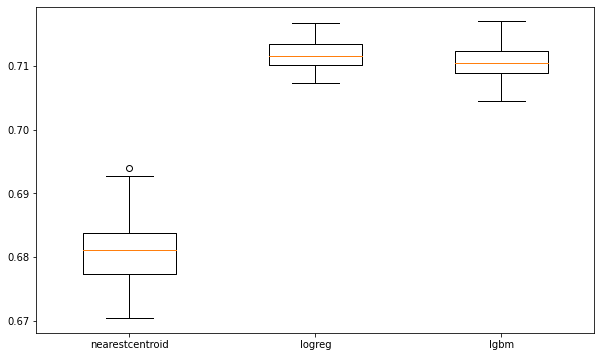

In [435]:
algoritmos = ['nearestcentroid','logreg','lgbm']
resultados = [scores1,scores2,scores3]

# Plot
plt.figure(figsize=(10,6))
box_data = resultados
plt.boxplot(box_data, widths = 0.5)
plt.xticks([1,2,3], algoritmos, rotation='horizontal')
# ax7.boxplot(box_data)
plt.show()

## 11.2 Teste de Normalidade: Shapiro Wilk

In [316]:
from scipy.stats import shapiro

resultados = [resultados_nearestcentroid, resultados_logreg, resultados_lgbm]
normalidade = []

for algoritmo in resultados:
    _, p = shapiro(algoritmo)
    p
    alpha = 0.05
    if p > alpha:
      print('Distribuição normal, p_value = {}'.format(p))
    else:
      print('Distribuição não normal, p_value = {}'.format(p))

Distribuição normal, p_value = 0.7354061603546143
Distribuição normal, p_value = 0.8901785016059875
Distribuição normal, p_value = 0.5418612957000732


## 11.3 Distribuição Normal: Testes paramétricos: Anova

Analise de variância para verificar se há diferença estatistica significante entre a média da acurácia balanceada dos modelos:

H0 - Hipotese Nula: Não há diferença estatística entre os algorítmos

In [317]:
from scipy.stats import f_oneway
_, p = f_oneway(resultados_nearestcentroid, resultados_logreg, resultados_lgbm)

alpha = 0.05
if p <= alpha:
    print('p-value = %s - Hipótese nula rejeitada.' %(p))
    print('Os resultados possuem diferença estatística significante com nivel de confiança de %s' %(1-alpha))
else:
    print('p-value = %s - Hipótese nula não pode ser rejeitada.' %(p))
    print('Os resultados não apresentam diferença estatística significante com nivel de confiança de %s' %(1-alpha) )

p-value = 2.640603373777943e-112 - Hipótese nula rejeitada.
Os resultados possuem diferença estatística significante com nivel de confiança de 0.95


## 11.4 Teste de Tukey

In [437]:
## Preparando os 30 resultados de cada algorítmo

lista_nearestcentroid = ['NearestCentroid' for i in range(len(resultados_nearestcentroid))]
lista_logreg = ['Regressao Logistica' for i in range(len(resultados_logreg))]
lista_lgbm = ['LGBM' for i in range(len(resultados_lgbm))]


lista_algoritmos = lista_nearestcentroid + lista_logreg + lista_lgbm

## Criando df com o nome dos algoritmos e os 30 resultados de cada
resultados_algoritmos = {'AUC': np.concatenate([resultados_nearestcentroid, resultados_logreg, resultados_lgbm]),
                         'algoritmo': lista_algoritmos}
resultados_algoritmos = pd.DataFrame(resultados_algoritmos)
#resultados_algoritmos

In [438]:
## Agrupando os resultados pela média
df_avaliacao = resultados_algoritmos.groupby('algoritmo').agg({'AUC':['mean','std']})
df_avaliacao

AUC          
                         mean       std
algoritmo                              
LGBM                 0.710607  0.002545
NearestCentroid      0.680940  0.005008
Regressao Logistica  0.711695  0.002095

In [321]:
# Realizando o teste de Tukey
from statsmodels.stats.multicomp import MultiComparison

compara_grupos = MultiComparison(resultados_algoritmos['metrica'], resultados_algoritmos['algoritmo'])
teste = compara_grupos.tukeyhsd()
print(teste)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
     group1            group2       meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------
           LGBM     NearestCentroid  -0.0297  0.001 -0.0312 -0.0282   True
           LGBM Regressao Logistica   0.0011 0.2003 -0.0004  0.0026  False
NearestCentroid Regressao Logistica   0.0308  0.001  0.0293  0.0322   True
--------------------------------------------------------------------------


## 11.5 Conclusão validação estatistica

Há diferença estatística entre NearestCentroid e os outros 2. Como o NearestCentroid foi o modelo que apresentou menor AUC podemos descartá-lo.

Não há diferença estatística na performance dos 2 algorítmos restantes LGBM e Regressão Logistica. Iremos escolher a Regressão logística pois apresentou maior AUC e menor desvio padrão.

- Modelo Final: Regressão Logística